## Identitas Diri
| Nama / NIM |:| Aditya Anandita Dharma Putra / 13219043|
|:---|:---|:---|

Pengerjaan UTS juga sudah dapat dilihat pada link berikut:

https://github.com/adityanandita/Engineering-Data-Science-Course/blob/main/UTS_TF4063_13219043_Aditya%20Anandita.ipynb

---

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Soal 1
Implementasi solusi analitik dari regresi linear pada data sintetik polinomial orde-10 dengan menggunakan sklearn

## Implementasi Tugas 1

In [2]:
# Menentukan seed untuk pembangkit random number
np.random.seed(13219043)

# Menentukan koefisien polinomial dan amplitude noise
# Koefisien polinomial diambil dari persamaan berikut
# (x-1)(x+1)(x-2)(x+2)(x-3)(x+3)(x-4)(x+4)(x-5)(x+5)
# = x^10 - 55x^8 + 1023x^6 - 7645x^4 + 21076x^2 - 14400
coef = [1, 0, -55, 0, 1023, 0, -7645, 0, 21076, 0, -14400]
noise_amp = 0.1

In [3]:
# Buat data sintetik
n = 100 # Jumlah data
x = np.linspace(-5, 5, n) # variabel independen
y_true = np.polyval(coef, x) # nilai y sebenarnya
y = y_true + noise_amp * np.random.randn(n) # nilai y yang diamati

In [4]:
# Buat matrix fitur polinomial dari x
poly = PolynomialFeatures(degree=10, include_bias=False)
X = poly.fit_transform(x.reshape(-1, 1))

In [5]:
# Implementasi Solusi Analitik
w = np.linalg.inv(X.T @ X) @ X.T @ y # vektor koefisien regresi

# Implementasi regresi linear menggunaakn sklearn
reg = LinearRegression(fit_intercept=False).fit(X, y)

In [6]:
# Membandingkan koefisien yang diperoleh dari kedua metode implementasi
print('Koefisien yang diperoleh dari solusi analitik:')
print(w)
print('Koefisien yang diperoleh dari sklearn:')
print(reg.coef_)

Koefisien yang diperoleh dari solusi analitik:
[ 2.01911023e-02  8.79225178e+03 -1.14512026e-02 -4.74365033e+03
  1.59063113e-03  7.45661609e+02 -7.78774834e-05 -4.34789821e+01
  1.23579488e-06  8.26903758e-01]
Koefisien yang diperoleh dari sklearn:
[ 2.01928870e-02  8.79225178e+03 -1.14510610e-02 -4.74365032e+03
  1.59052492e-03  7.45661609e+02 -7.78688131e-05 -4.34789821e+01
  1.23560312e-06  8.26903758e-01]


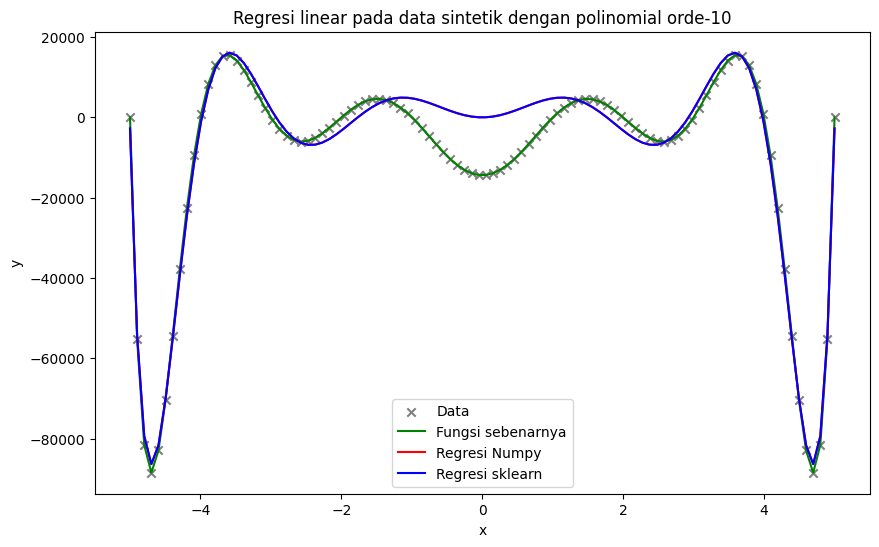

In [7]:
# Plot data dan hasil kurva regresi
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Data", color="gray", marker="x")
plt.plot(x, y_true, label="Fungsi sebenarnya", color="green")
plt.plot(x, X @ w, label="Regresi Numpy", color="red")
plt.plot(x, reg.predict(X), label="Regresi sklearn", color="blue")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresi linear pada data sintetik dengan polinomial orde-10")
plt.show()

Selanjutnya melakukan implementasi solusi analitik dan juga regresi linear menggunakan sklearn dan numpy setelah standardisasi fitur

In [8]:
X_scaled = StandardScaler().fit_transform(X)

# Implementasi regresi linear menggunaakn numpy & sklearn
w_scaled = np.linalg.inv(X_scaled.T @ X_scaled) @ X_scaled.T @ y # vektor koefisien regresi
reg_scaled = LinearRegression(fit_intercept=False).fit(X_scaled, y)

In [9]:
# Membandingkan koefisien yang diperoleh dari kedua implementasi
print("Koefisien dari implementasi Numpy dengan standardisasi fitur:")
print(w_scaled)
print("Koefisien dari implementasi sklearn dengan standardisasi fitur:")
print(reg_scaled.coef_)

Koefisien dari implementasi Numpy dengan standardisasi fitur:
[ 5.88726949e-02  1.60240897e+05 -5.57385555e-01 -1.32544020e+06
  1.57452736e+00  4.03002432e+06 -1.68248474e+00 -5.00676428e+06
  6.04430995e-01  2.13390277e+06]
Koefisien dari implementasi sklearn dengan standardisasi fitur:
[ 5.88734089e-02  1.60240897e+05 -5.57392233e-01 -1.32544020e+06
  1.57454788e+00  4.03002432e+06 -1.68250969e+00 -5.00676428e+06
  6.04441424e-01  2.13390277e+06]


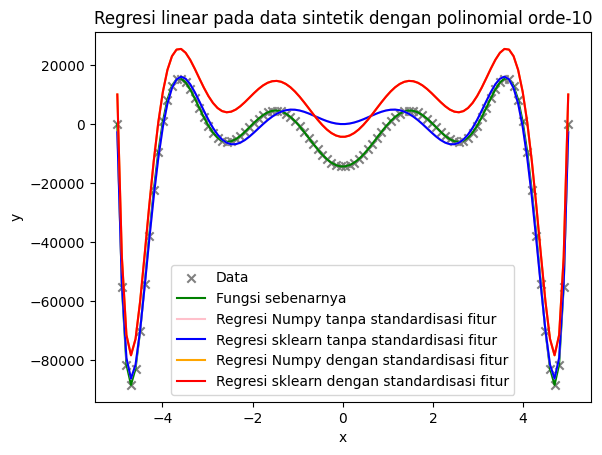

In [10]:
# Membuat plot data dan kurva regresi
plt.scatter(x, y, label="Data", color = "gray", marker="x")
plt.plot(x, y_true, label="Fungsi sebenarnya", color="green")
plt.plot(x, X @ w, label="Regresi Numpy tanpa standardisasi fitur", color="pink")
plt.plot(x, reg.predict(X), label="Regresi sklearn tanpa standardisasi fitur", color="blue")
plt.plot(x, X_scaled @ w_scaled, label="Regresi Numpy dengan standardisasi fitur", color="orange")
plt.plot(x, reg_scaled.predict(X_scaled), label="Regresi sklearn dengan standardisasi fitur", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresi linear pada data sintetik dengan polinomial orde-10")
plt.show()

In [11]:
# Hitung R2 score untuk setiap jenis regresi
from sklearn.metrics import r2_score
print("R2 score tanpa standardisasi fitur:")
print(f"Numpy  : {r2_score(y, X @ w)*100:.3f}%")
print(f"sklearn: {r2_score(y, reg.predict(X))*100:.3f}%")
print("\nR2 score dengan standardisasi fitur:")
print(f"Numpy  : {r2_score(y, X_scaled @ w_scaled)*100:.3f}%")
print(f"sklearn: {r2_score(y, reg_scaled.predict(X_scaled))*100:.3f}%")

R2 score tanpa standardisasi fitur:
Numpy  : 95.548%
sklearn: 95.548%

R2 score dengan standardisasi fitur:
Numpy  : 84.064%
sklearn: 84.064%


## Analisis No. 1

### Percobaan 1:
- Dari hasil plotting sebelum dilakukan standardisasi fitur, didapatkan hasil implementasi kode yang hanya menggunakan numpy sudah memberikan hasil koefisien yang sama dengan hasil dari sklearn. Dengan demikian, dapat disimpulkan bahwa hasil implementasi sudah benar karena kedua metode menunjukkan hasil yang konsisten. 
- Kemudian apabila diperhatikan kembali hasil yang didapatkan, ternyata hasil tersebut masih lumayan jauh nilainya dari fungsi sebenarnya. Namun, ketika dihitung $R^2$ $Score$-nya didapatkan sebesar $95.55$% dimana nilai ini sebenarnya sudah sangat baik dalam memprediksi nilai aslinya. 
- Untuk membandingkan hasilnya dengan standardisasi fitur, selanjutnya dilakukan percobaan dengan melakukan standardisasi fitur terlebih dahulu sebelum melakukan pembuatan fungsi regresi

### Percobaan 2:
- Berdasarkan hasil yang didapatkan setelah dilakukannya standardisasi fitur, dapat disimpulkan bahwa implementasi yang dilakukan sudah menghasilkan koefisien yang sama antara metode menggunakan solusi analitik maupun menggunakan library LinearRegression menggunakan sklearn. Namun jika dibandingkan dengan hasil yang didapatkan pada nomor 1, memang terdapat perbedaan yang disebabkan oleh standardisasi fitur yaitu semakin besarnya error yang didapatkan. Nilai $R^2$ $Score$ yang dihasilkan yaitu sebesar $84.06$% dimana nilai ini lebih kecil dibandingkan percobaan pertama.
- Semakin besarnya error yang terjadi disebabkan oleh perbedaan skala antara fitur-fitur polinomial yang digunakan dimana fitur-fitur ini memiliki skala yang berbeda-beda sehingga akan diperoleh koefisien regresi yang berbeda untuk menyesuaikan dengan skala tersebut. Dengan adanya standardisasi fitur, terdapat kesamaan skala antar tiap fitur sehingga memiliki rata-rata bernilai 0 dan standar deviasi bernilai satu sehingga koefisien yang diperoleh juga akan memiliki skala yang sama.


### Beberapa poin yang didapatkan:
1. Standardisasi fitur dapat meningkatkan stabilitas numerik dari solusi analitik karena matrix yang dihasilkan lebih dekat ke matrix identitas
2. Standardisasi fitur juga memudahkan interpretasi koefisien regresi dan mempercepat konvergensi algoritma optimasi yang digunakan
3. Standardisasi fitur menyebabkan hubungan antara variabel independen dan dependen dalam bentuk aslinya menjadi tersembunyi karena adanya scaling fitur

### Perbandingan Percobaan 1 dan 2:
Berdasarkan perhitungan nilai $RMSE$ dan $R^2$ $Score$ antara data yang mengalami standardisasi fitur dan yang tidak mengalami, terlihat bahwa data-data yang tidak mengalami standardisasi fitur memiliki nilai yang lebih baik dibandingkan yang mengalami standardisasi fitur. Hal ini mendukung poin-poin yang didapatkan sebelumnya dimana hubungan antara variabel independen dan dependen menjadi tersembunyi akibat scaling fitur.

---

# Soal 2
Implementasi Class LinearRegression pada sklearn menggunakan dataset `aqsoldb`

## Implementasi Soal 2

In [12]:
# Import library tambahan yang belum diimport
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
"""Membaca dataset aqsoldb yang datanya diambil dari link berikut
https://www.kaggle.com/datasets/sorkun/aqsoldb-a-curated-aqueous-solubility-dataset/data"""

df = pd.read_csv("curated-solubility-dataset.csv")

In [14]:
# melihat 5 data pertama
df.head()

ID                                               Name  \
0  A-3         N,N,N-trimethyloctadecan-1-aminium bromide   
1  A-4                           Benzo[cd]indol-2(1H)-one   
2  A-5                               4-chlorobenzaldehyde   
3  A-8  zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...   
4  A-9  4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...   

                                               InChI  \
0  InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...   
1  InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...   
2        InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H   
3  InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...   
4  InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...   

                      InChIKey  \
0  SZEMGTQCPRNXEG-UHFFFAOYSA-M   
1  GPYLCFQEKPUWLD-UHFFFAOYSA-N   
2  AVPYQKSLYISFPO-UHFFFAOYSA-N   
3  XTUPUYCJWKHGSW-UHFFFAOYSA-L   
4  FAUAZXVRLVIARB-UHFFFAOYSA-N   

                                              SMILES  Solubility   SD  \
0                [Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C   -3.616127  0.0   
1                               O=C1Nc2cccc3cccc1c23   -3.254767  0.0   
2                                    Clc1ccc(C=O)cc1   -2.177078  0.0   
3  [Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...   -3.924409  0.0   
4  C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...   -4.662065  0.0   

   Ocurrences Group    MolWt  ...  NumRotatableBonds  NumValenceElectrons  \
0           1    G1  392.510  ...               17.0                142.0   
1           1    G1  169.183  ...                0.0                 62.0   
2           1    G1  140.569  ...                1.0                 46.0   
3           1    G1  756.226  ...               10.0                264.0   
4           1    G1  422.525  ...               12.0                164.0   

   NumAromaticRings  NumSaturatedRings  NumAliphaticRings  RingCount    TPSA  \
0               0.0                0.0                0.0        0.0    0.00   
1               2.0                0.0                1.0        3.0   29.10   
2               1.0                0.0                0.0        1.0   17.07   
3               6.0                0.0                0.0        6.0  120.72   
4               2.0                4.0                4.0        6.0   56.60   

    LabuteASA      BalabanJ      BertzCT  
0  158.520601  0.000000e+00   210.377334  
1   75.183563  2.582996e+00   511.229248  
2   58.261134  3.009782e+00   202.661065  
3  323.755434  2.322963e-07  1964.648666  
4  183.183268  1.084427e+00   769.899934  

[5 rows x 26 columns]

In [15]:
# Mendapatkan informasi mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9982 non-null   object 
 1   Name                 9982 non-null   object 
 2   InChI                9982 non-null   object 
 3   InChIKey             9982 non-null   object 
 4   SMILES               9982 non-null   object 
 5   Solubility           9982 non-null   float64
 6   SD                   9982 non-null   float64
 7   Ocurrences           9982 non-null   int64  
 8   Group                9982 non-null   object 
 9   MolWt                9982 non-null   float64
 10  MolLogP              9982 non-null   float64
 11  MolMR                9982 non-null   float64
 12  HeavyAtomCount       9982 non-null   float64
 13  NumHAcceptors        9982 non-null   float64
 14  NumHDonors           9982 non-null   float64
 15  NumHeteroatoms       9982 non-null   f

In [16]:
# Mengecek apakah terdapat nilai null pada dataset
df.isnull().sum()

ID                     0
Name                   0
InChI                  0
InChIKey               0
SMILES                 0
Solubility             0
SD                     0
Ocurrences             0
Group                  0
MolWt                  0
MolLogP                0
MolMR                  0
HeavyAtomCount         0
NumHAcceptors          0
NumHDonors             0
NumHeteroatoms         0
NumRotatableBonds      0
NumValenceElectrons    0
NumAromaticRings       0
NumSaturatedRings      0
NumAliphaticRings      0
RingCount              0
TPSA                   0
LabuteASA              0
BalabanJ               0
BertzCT                0
dtype: int64

Terlihat bahwa data sudah bersih dan memiliki nilai secara keseluruhan

In [17]:
# Mendapatkan nama-nama kolom dari dataset
df.columns

Index(['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'SD',
       'Ocurrences', 'Group', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT'],
      dtype='object')

d:\Application\Python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


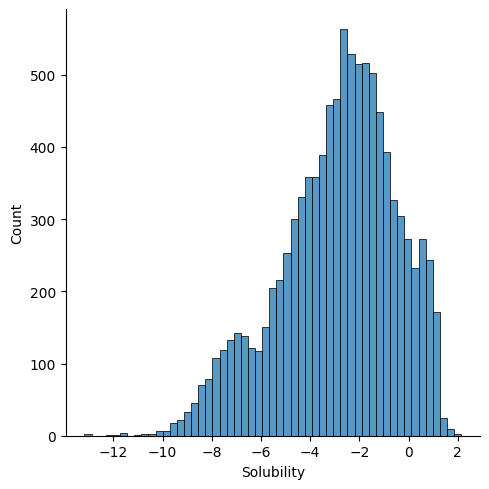

In [18]:
# Plot histogram
sns.displot(df.Solubility)
plt.show()

In [19]:
# Mengambil feature-feature yang ingin dianalisis dan membuatnya menjadi dataframe baru
feature_start = list(df.columns).index("MolWt")
feature_names = df.columns[feature_start:]

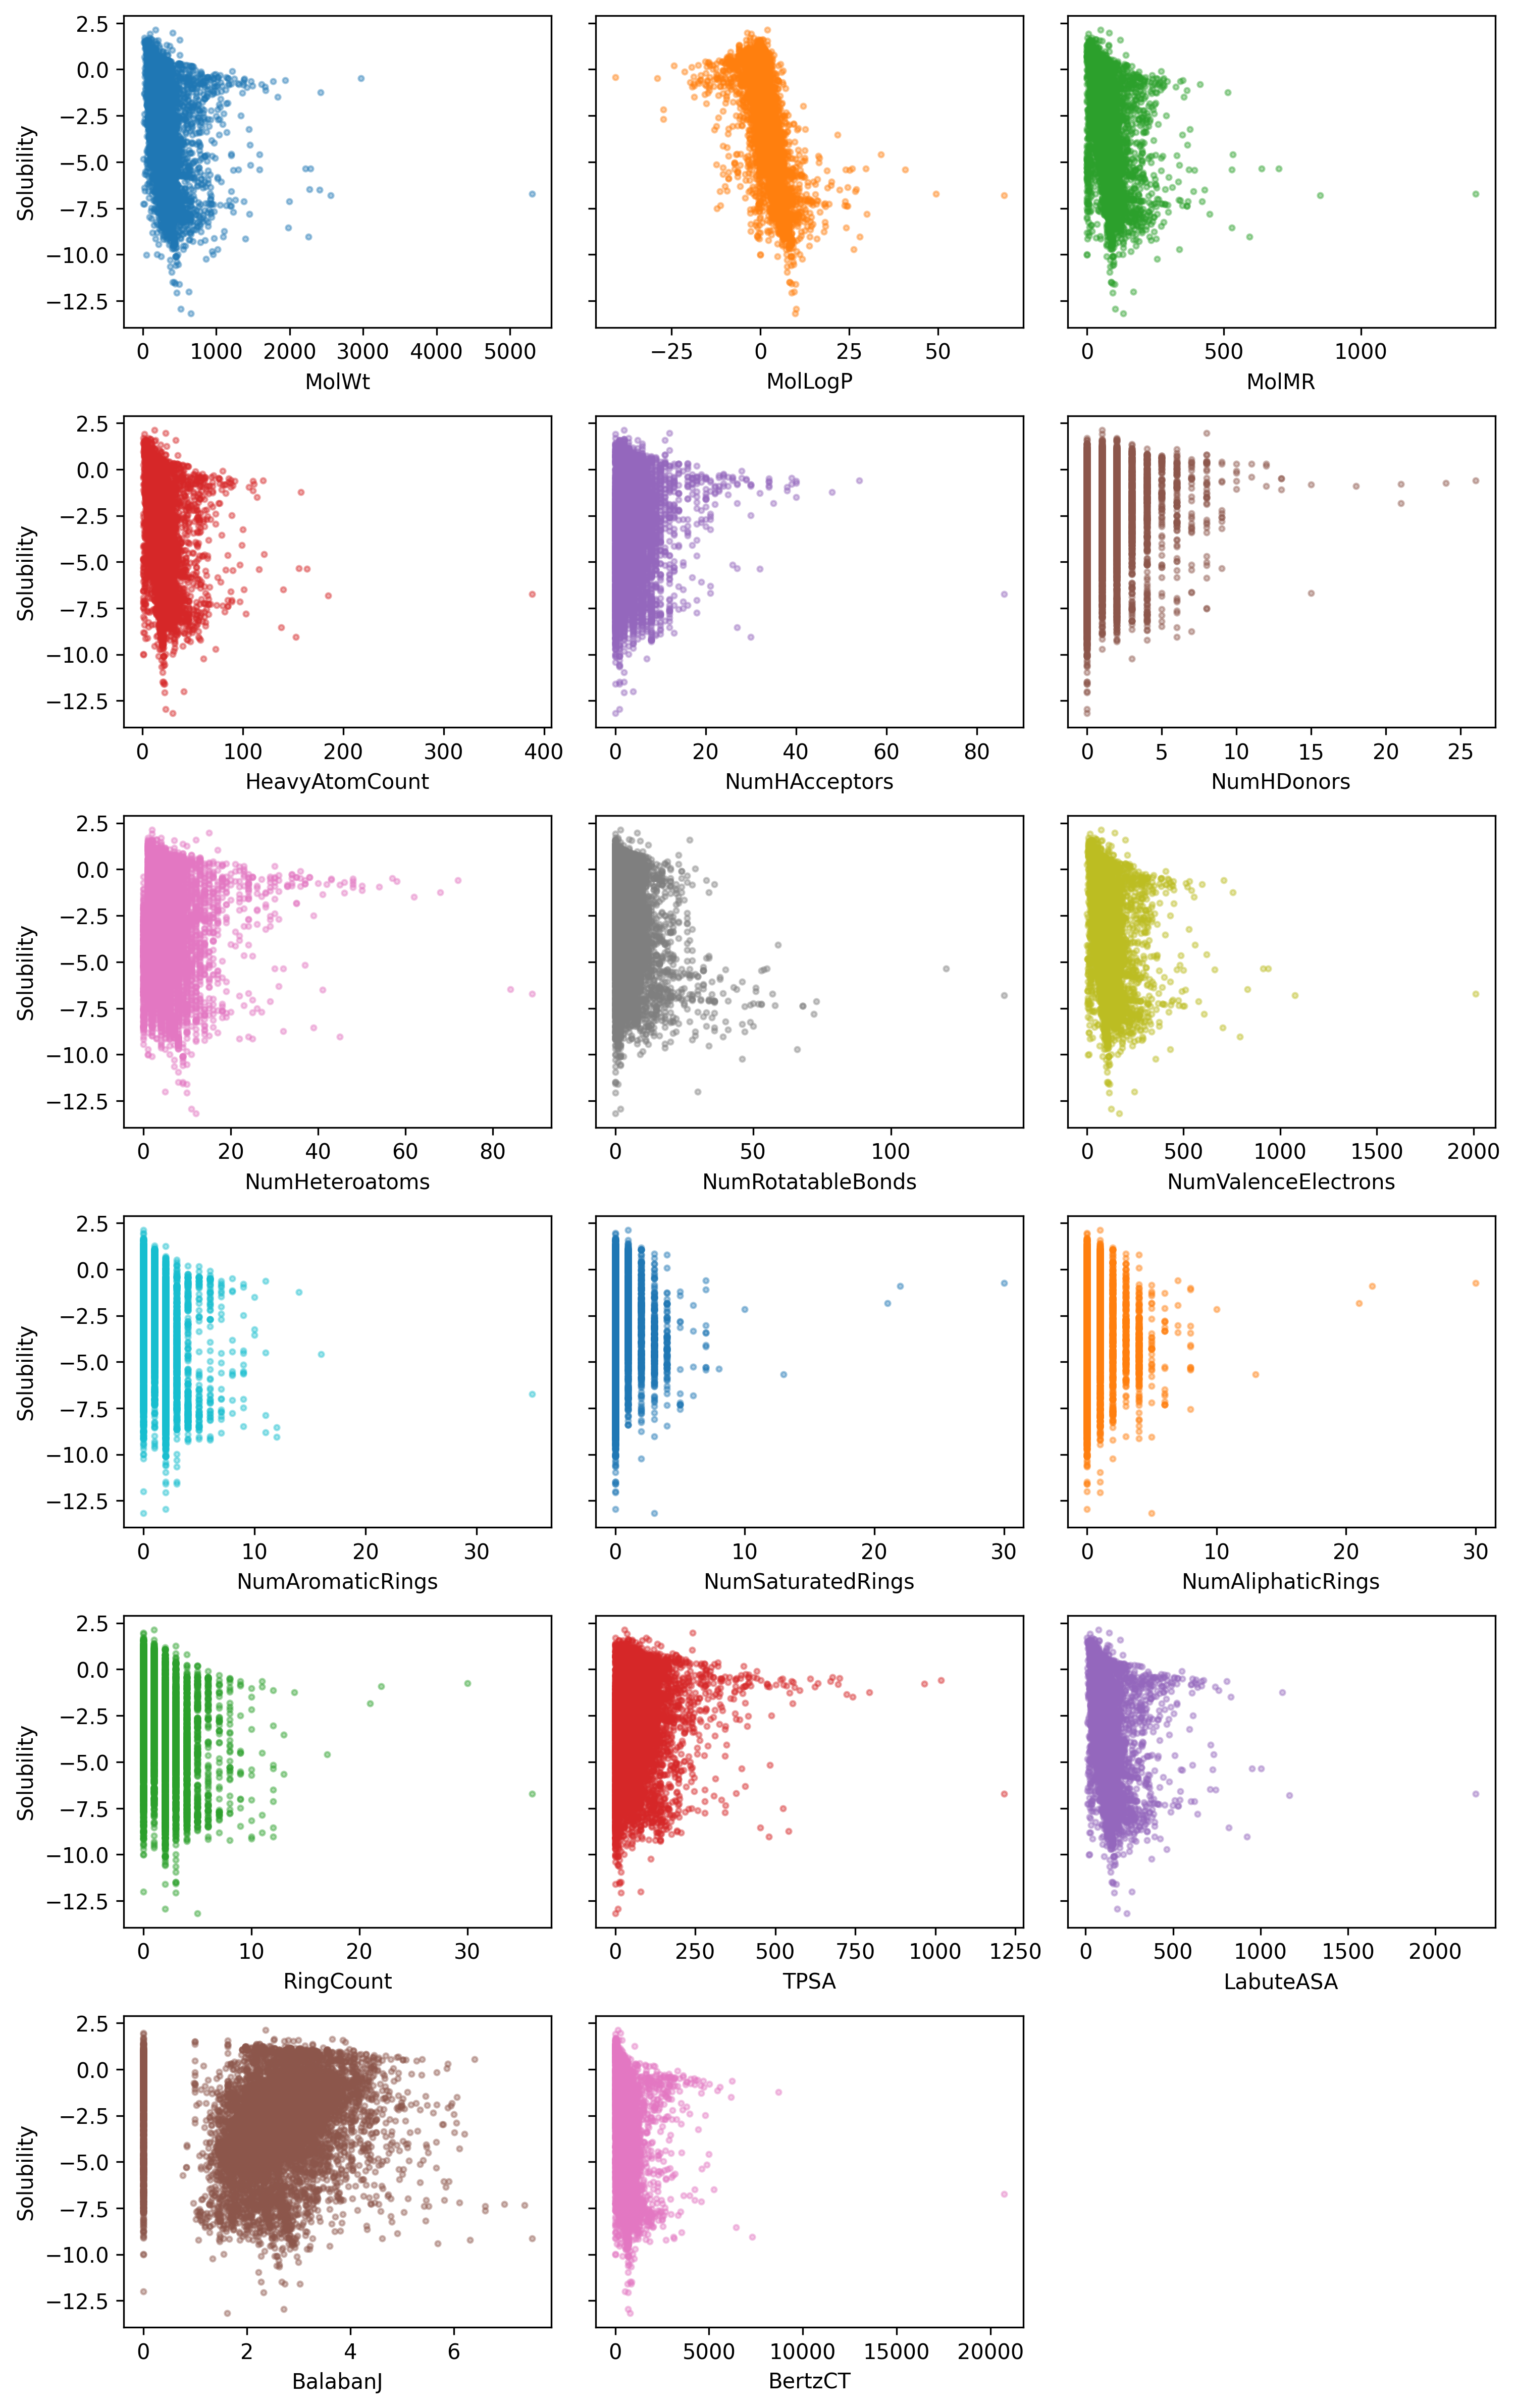

In [20]:
# Membuat plot scatter untuk setiap feature
fig, axs = plt.subplots(nrows=6, ncols=3, sharey=True, figsize=(10, 16), dpi=300)
axs = axs.flatten()
for i, n in enumerate(feature_names):
    axs[i].scatter(df[n], df.Solubility, s=6, alpha=0.4, color=f"C{i}")
    if i % 3 == 0:
        axs[i].set_ylabel("Solubility")
    axs[i].set_xlabel(n)

# Menyembunyikan subplot yang kosong
for i in range(len(feature_names), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [21]:
features = df.loc[:, feature_names].values
target = df.Solubility.values
feature_dim = features.shape[1]

print(f"Jumlah fitur: {feature_dim}")
print(f"Feature names:\n {feature_names}")

Jumlah fitur: 17
Feature names:
 Index(['MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT'],
      dtype='object')


In [22]:
# Define model
model = LinearRegression().fit(features, target)

# Predict target
target_pred = model.predict(features)

# Calculate RMSE and R2 score
rmse = np.sqrt(mean_squared_error(target, target_pred))
r2 = model.score(features, target)

# Print koefisien dan intercept
print("Koefisien:")
print(model.coef_)
print("Intercept:")
print(model.intercept_)

Koefisien:
[-0.00476603 -0.44367598  0.01455881 -0.4734423   0.1085899   0.14979819
 -0.12915866  0.04084007  0.07663386 -0.29964953  0.13950952 -0.04278944
 -0.34243896 -0.00325231 -0.01077072 -0.02663261  0.00447931]
Intercept:
-0.5853188749769833


In [23]:
# Print RMSE dan R2 score
print(f"RMSE: {rmse} and R2 score: {r2}")

RMSE: 1.6505305477970256 and R2 score: 0.5141853614726429


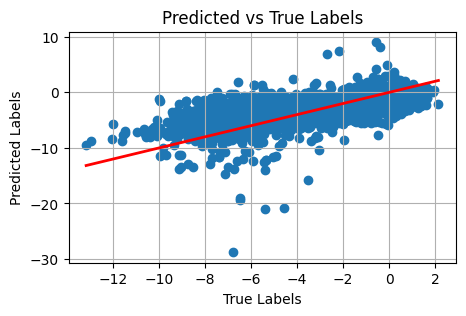

In [24]:
# Plot data dan hasil prediksi terhadap data secara keseluruhan
plt.figure(figsize=(5, 3))
plt.scatter(target, target_pred, marker="o")
plt.plot([target.min(), target.max()], [target.min(), target.max()], lw=2, color="red")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.grid(True)
plt.title("Predicted vs True Labels")
plt.show()

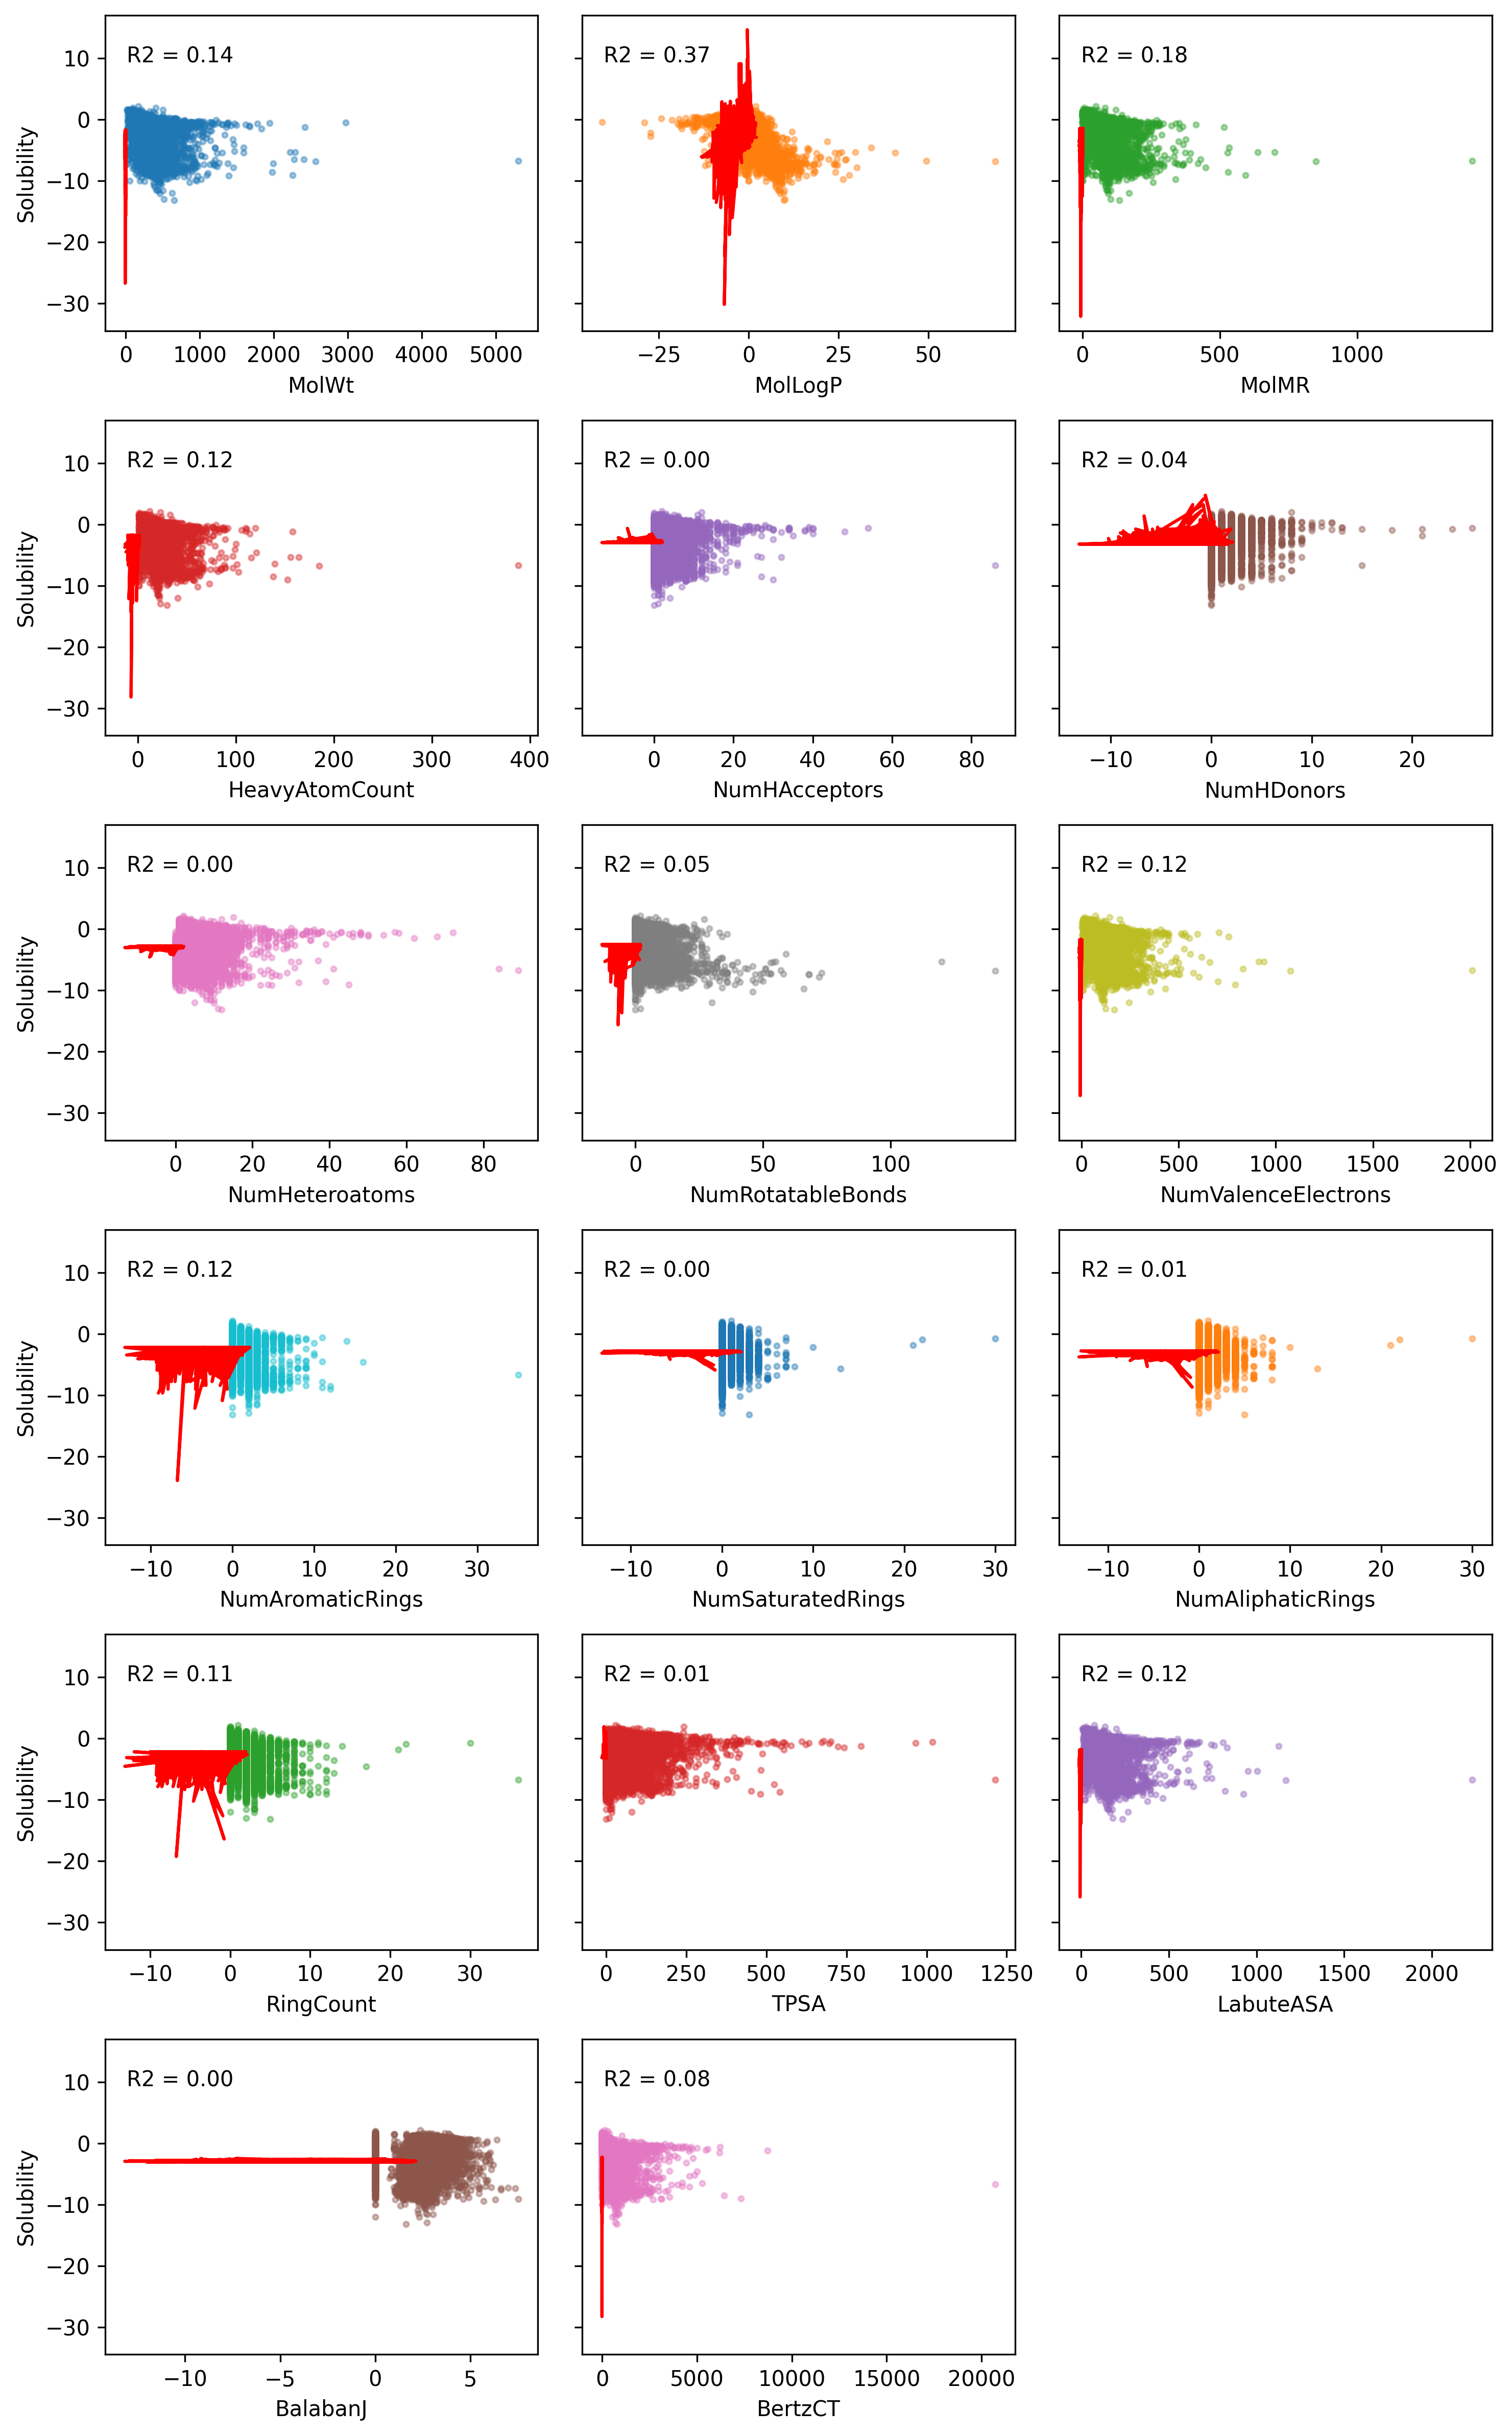

In [25]:
# Membuat regresi linear untuk setiap feature
fig, axs = plt.subplots(nrows=6, ncols=3, sharey=True, figsize=(10, 16), dpi=300)
axs = axs.flatten()
for i, n in enumerate(feature_names):
    axs[i].scatter(df[n], df.Solubility, s=6, alpha=0.4, color=f"C{i}")
    x = features[:, i].reshape(-1, 1)
    model = LinearRegression().fit(x, target)
    y_predict = model.predict(x)
    axs[i].plot(target, y_predict, color="red")
    if i % 3 == 0:
        axs[i].set_ylabel("Solubility")
    axs[i].set_xlabel(n)
    axs[i].text(0.05, 0.85, f"R2 = {model.score(x, target):.2f}", transform=axs[i].transAxes)
    
# Menyembunyikan subplot yang kosong
for i in range(len(feature_names), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [26]:
# Untuk membuat perhitungan loss, kita gunakan library jax sebagai berikut.
import jax
import jax.numpy as jnp

In [27]:
# define jax function
def linear_model(x, w, b):
    return jnp.dot(x, w) + b

def loss(y, target):
    return jnp.mean((y - target)**2)

def loss_wrapper(w, b, data):
    return loss(linear_model(data[0],w,b), data[1])

In [28]:
# Inisialisasi parameter
np.random.seed(13219043)
w2 = np.random.normal(size=feature_dim)
b2 = 0.0

In [29]:
# Menghitung loss awal
print(f"loss awal: {loss(linear_model(features, w2, b2), target)}")

loss_grad = jax.grad(loss_wrapper, (0,1))

# Menghitung loss gradient
print(f"loss gradient: {loss_grad(w2, b2, (features, target))}")

loss awal: 374144.6875
loss gradient: (Array([-2.8741925e+05, -1.3092286e+03, -7.1776594e+04, -1.9732078e+04,
       -4.6211577e+03, -1.0947407e+03, -6.4045391e+03, -3.2624351e+03,
       -1.0075907e+05, -1.7962969e+03, -2.0442892e+02, -4.5250720e+02,
       -2.2488098e+03, -7.8106484e+04, -1.2158398e+05, -8.9526221e+02,
       -8.3154981e+05], dtype=float32), Array(-531.58093, dtype=float32, weak_type=True))


In [30]:
loss_progress = []
eta = 1e-6
data = (features, target)
for i in range(20):
    w2 -= eta * loss_grad(w2, b2, data)[0]
    b2 -= eta * loss_grad(w2, b2, data)[1]
    loss_progress.append(loss_wrapper(w2, b2, data))

In [31]:
print(f"Last loss: {loss_progress[-1]}")

Last loss: 14008.8642578125


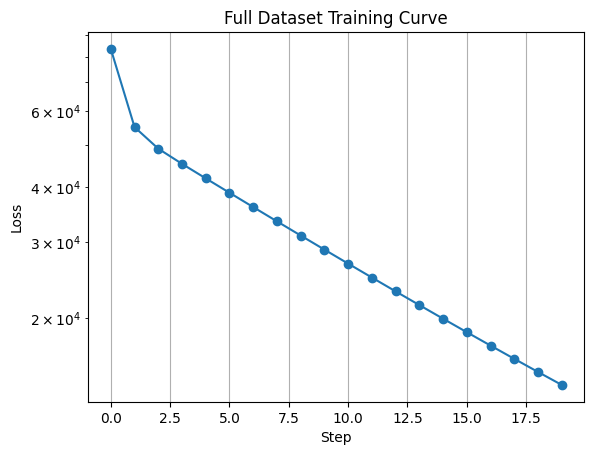

In [32]:
# Membuat plotting loss
plt.plot(loss_progress, marker="o")
plt.xlabel("Step")
plt.yscale("log")
plt.ylabel("Loss")
plt.grid(True)
plt.title("Full Dataset Training Curve")
plt.show()

## Analisis Tugas 2:

1. Proses pengerjaan regresi linear dengan menggunakan sklearn sudah dilakukan dengan memanfaatkan LinearRegression pada dataset `aqsoldb` menggunakan seluruh data. Hasil yang diberikan sudah cukup baik dalam memprediksi solubilitas dari data `aqsoldb`. Namun, masih terdapat beberapa data yang memiliki selisih sangat besar antara nilai sebenarnya dan prediksinya. Hal ini disebabkan oleh beberapa faktor seperti:
    - Kurangnya fitur yang dapat menjelaskan variasi solubilitas secara lengkap
    - Adanya noise atau outlier yang tidak diproses lebih lanjut sebelum dilakukan modeling, dll.
2. Plot paritas menunjukkan bagaimana persebaran tiap fitur terhadap solubity dan sudah dilakukan dengan baik
3. Kemudian, juga dilakukan perhitungan untuk mendapatkan RMSE dan $R^2$ dengan nilai yang diperoleh yaitu $RMSE: 1.65$ dan $R^2$ $score: 51.42$% dimana nilai ini menunjukkan bahwa model yang dihasilkan masih buruk dalam memprediksi nilai aslinya.
4. Selanjutnya juga dilakukan perhitungan nilai loss dari data yang dimiliki dan didapatkan nilai loss terkecil yaitu $Loss = 14,008.86$

---

# Soal 3
Implementasi Class MLPRegressor pada sklearn menggunakan dataset `aqsoldb` dan membandingkan hasilnya dengan percobaan 2

## Implementasi Soal 3

In [33]:
# Menambahkan library yang dibutuhkan
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import scale

In [34]:
# Memanggil kembali dataframe features untuk diolah pada soal 3
features_soal3 = df.loc[:, feature_names].values
target_soal3 = df.Solubility.values

In [35]:
# Lakukan preprocessing data
features_scaled = scale(features_soal3)

In [36]:
# Define model
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation="relu",
    solver="adam",
    max_iter = 100
).fit(features_scaled, target_soal3)

d:\Application\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
# Predict target
target_pred = mlp.predict(features_scaled)

# Menghitung RMSE dan R2 score
rmse = np.sqrt(mean_squared_error(target_soal3, target_pred))
r2 = mlp.score(features_scaled, target_soal3)

# Print RMSE dan R2 score
print(f"RMSE: {rmse} and R2 score: {r2}")

RMSE: 1.0546480147357142 and R2 score: 0.801647105425398


In [44]:
# buatkan kembali model dengan hidden_layer_sizes yang berbeda-beda dalam for loop
mlp_list = []
rmse_mlp_list, r2_mlp_list, target_pred_list = [], [], []

# berikut adalah kombinasi hidden_layer_sizes yang digunakan dalam 2 dimensi
hidden_layer_sizes = [(100, 50), (50, 25), (100, 25),
                      (50, 50), (100, 100), (50, 100)]

for i, hls in enumerate(hidden_layer_sizes):
    mlp_list.append(MLPRegressor(
        hidden_layer_sizes=hls,
        activation="relu",
        solver="adam",
        max_iter = 100
    ))
    mlp_list[i].fit(features_scaled, target_soal3)
    target_pred = mlp_list[i].predict(features_scaled)
    target_pred_list.append(target_pred)
    rmse_mlp_list.append(np.sqrt(mean_squared_error(target_soal3, target_pred)))
    r2_mlp_list.append(mlp_list[i].score(features_scaled, target_soal3))

d:\Application\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Application\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Application\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Application\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Application\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptro

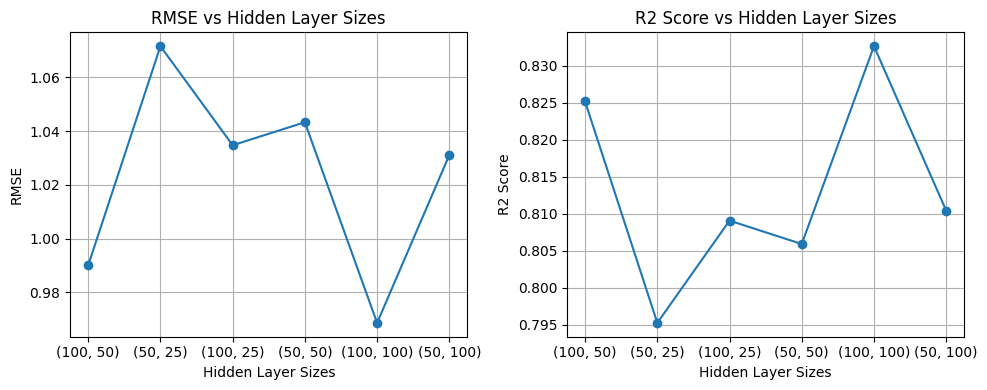

In [45]:
# Buat plotting RMSE dan R2 score
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(rmse_mlp_list, marker="o")
plt.xticks(range(len(hidden_layer_sizes)), hidden_layer_sizes)
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("RMSE")
plt.grid(True)
plt.title("RMSE vs Hidden Layer Sizes")

plt.subplot(122)
plt.plot(r2_mlp_list, marker="o")
plt.xticks(range(len(hidden_layer_sizes)), hidden_layer_sizes)
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("R2 Score")
plt.grid(True)
plt.title("R2 Score vs Hidden Layer Sizes")

plt.tight_layout()
plt.show()

In [53]:
# Memanggil nilai y prediksi terbaik dari hasil looping sebelumnya
target_pred_model_mlp_best = target_pred_list[r2_mlp_list.index(max(r2_mlp_list))]

# Print nilai RMSE dan R2 score terbaik
print(f"Best RMSE: {min(rmse_mlp_list)}")
print(f"Best R2 score: {max(r2_mlp_list)}")

Best RMSE: 0.9687067662822826
Best R2 score: 0.8326567766575348


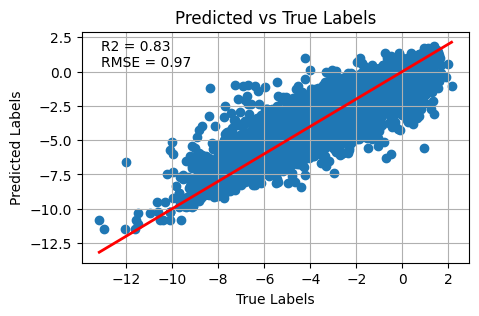

In [54]:
# Plot data dan hasil prediksi terhadap data secara keseluruhan
plt.figure(figsize=(5, 3))
plt.scatter(target_soal3, target_pred_model_mlp_best, marker="o")
plt.plot([target_soal3.min(), target_soal3.max()], [target_soal3.min(), target_soal3.max()], lw=2, color="red")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.grid(True)
plt.text(0.05, 0.85, f"R2 = {max(r2_mlp_list):.2f}\nRMSE = {min(rmse_mlp_list):.2f}", transform=plt.gca().transAxes)
plt.title("Predicted vs True Labels")
plt.show()

## Analisis Soal 3

### Analisis Grafik
Berdasarkan grafik di atas terlihat bahwa parameter hidden_layer_sizes terbaik untuk model yang digunakan adalah (100,100) dengan nilai $R^2$ $score: 83.26$% dan $RMSE: 0.97$

### Perbandingan hasil implementasi soal 2 dan soal 3
Berdasarkan percobaan yang dilakukan, didapatkan bahwa hasil pemodelan menggunakan `model MLPRegressor dapat memberikan hasil yang lebih baik daripada model Linear Regression` yang telah digunakan pada soal sebelumnya. Pada model Linear Regression sebelumnya, didapatkan $RMSE: 1.65$ dan $R^2$ $score: 51.42$%. Dengan menggunakan MLPRegressor, hasil yang didapatkan jauh meningkat yaitu $R^2$ $score: 83.26$% dan $RMSE: 0.97$. Hal ini menunjukkan bahwa model MLPRegressor dapat menjelaskan varians dari label sebenarnya lebih baik dan memiliki kesalahan prediksi yang lebih kecil daripada model linear.
Dari Percobaan ini juga didapatkan kesimpulan bahwa ternyata pendekatan melalui regresi linear tidak terlalu baik dalam memprediksi nilai sehingga dibutuhkan regresi non-linear dalam meningkatkan akurasi dari prediksi nilai tersebut.

---

# Soal 4
Perbandingan hasil implementasi ketika digunakan fungsi `train_test_split` pada sklearn untuk membagi dataset menjadi data latih dan data uji dari data `aqsoldb` yang digunakan juga pada soal 2 dan soal 3.

## Implementasi Soal 4

In [55]:
# memanggil kembali dataframe features untuk diolah pada soal 4
features_soal4 = df.loc[:, feature_names].values
target_soal4 = df.Solubility.values

In [56]:
# Lakukan preprocessing data
features_scaled = scale(features_soal4)

In [57]:
# Gunakan fungsi train_test_split untuk membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_soal4, test_size=0.33)

In [65]:
# Define Model Linear dan MLP
reg_linear = LinearRegression().fit(X_train, y_train)
reg_mlp = MLPRegressor(
    hidden_layer_sizes=(100, 100),
    activation="relu",
    solver="adam",
    max_iter = 100
).fit(X_train, y_train)

d:\Application\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [66]:
# Predict target
target_train_pred_linear = reg_linear.predict(X_train)
target_test_pred_linear = reg_linear.predict(X_test)
target_train_pred_mlp = reg_mlp.predict(X_train)
target_test_pred_mlp = reg_mlp.predict(X_test)

In [67]:
# Menghitung RMSE dan R2 score untuk linear regression
rmse_train_linear = np.sqrt(mean_squared_error(y_train, target_train_pred_linear))
rmse_test_linear = np.sqrt(mean_squared_error(y_test, target_test_pred_linear))
r2_train_linear = reg_linear.score(X_train, y_train)
r2_test_linear = reg_linear.score(X_test, y_test)


In [68]:
# Print RMSE dan R2 score untuk linear regression
print("Linear Regression:")
print(f"RMSE train: {rmse_train_linear}\nRMSE test: {rmse_test_linear}")
print(f"R2 score train: {r2_train_linear}\nR2 score test: {r2_test_linear}")

Linear Regression:
RMSE train: 1.666137478910248
RMSE test: 1.636876462404547
R2 score train: 0.4978543989759505
R2 score test: 0.5355080409507519


In [69]:
# Menghitung RMSE dan R2 score untuk MLP
rmse_train_mlp = np.sqrt(mean_squared_error(y_train, target_train_pred_mlp))
rmse_test_mlp = np.sqrt(mean_squared_error(y_test, target_test_pred_mlp))
r2_train_mlp = reg_mlp.score(X_train, y_train)
r2_test_mlp = reg_mlp.score(X_test, y_test)

In [70]:
# Print RMSE dan R2 score untuk MLP
print("MLP Regressor:")
print(f"RMSE train: {rmse_train_mlp}\nRMSE test: {rmse_test_mlp}")
print(f"R2 score train: {r2_train_mlp}\nR2 score test: {r2_test_mlp}")

MLP Regressor:
RMSE train: 0.9828006820148404
RMSE test: 1.1822839880029383
R2 score train: 0.8252814996495723
R2 score test: 0.7576795826209963


Text(0.1, 0.9, 'R^2 = 0.758\nRMSE = 1.182')

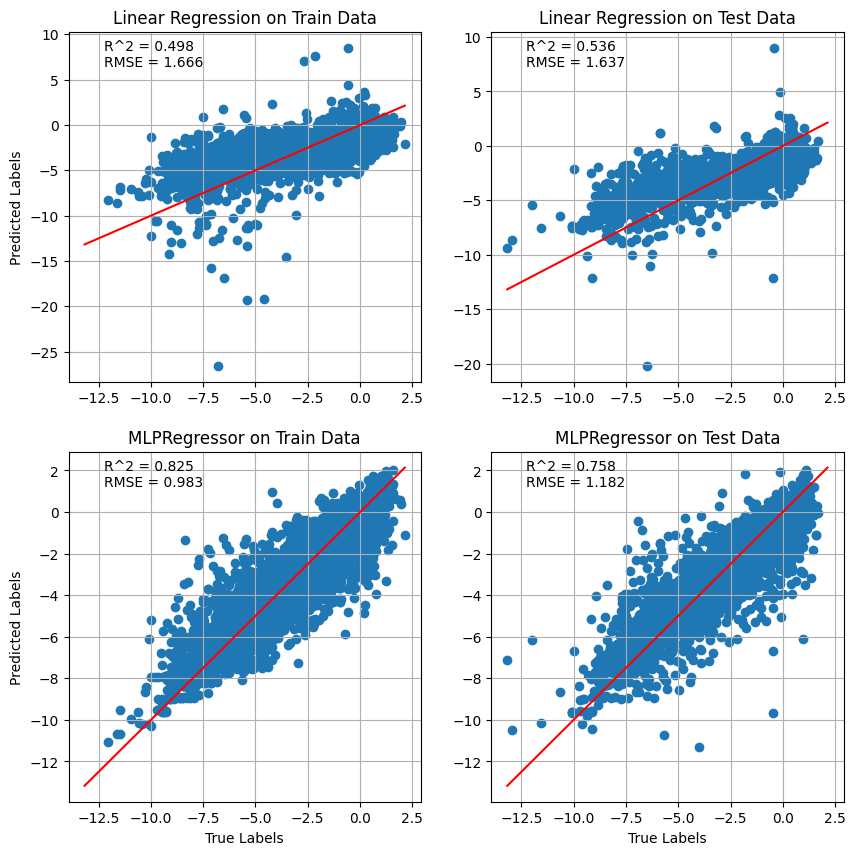

In [71]:
# Membuat plot paritas antara target sebenarnya dan hasil prediksi untuk data training dan data testing
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
xmin = min(y_train.min(), y_test.min())
xmax = max(y_train.max(), y_test.max())

axes[0, 0].scatter(y_train, target_train_pred_linear, marker="o")
axes[0, 0].set_ylabel("Predicted Labels")
axes[0, 0].set_title("Linear Regression on Train Data")
axes[0, 0].grid(True)
axes[0, 0].plot([xmin, xmax], [xmin, xmax], color="red")
axes[0, 0].text(0.1, 0.9, f"R^2 = {r2_train_linear:.3f}\nRMSE = {rmse_train_linear:.3f}", transform=axes[0, 0].transAxes)

axes[0, 1].scatter(y_test, target_test_pred_linear, marker="o")
axes[0, 1].set_title("Linear Regression on Test Data")
axes[0, 1].grid(True)
axes[0, 1].plot([xmin, xmax], [xmin, xmax], color="red")
axes[0, 1].text(0.1, 0.9, f"R^2 = {r2_test_linear:.3f}\nRMSE = {rmse_test_linear:.3f}", transform=axes[0, 1].transAxes)

axes[1, 0].scatter(y_train, target_train_pred_mlp, marker="o")
axes[1, 0].set_xlabel("True Labels")
axes[1, 0].set_ylabel("Predicted Labels")
axes[1, 0].set_title("MLPRegressor on Train Data")
axes[1, 0].grid(True)
axes[1, 0].plot([xmin, xmax], [xmin, xmax], color="red")
axes[1, 0].text(0.1, 0.9,f"R^2 = {r2_train_mlp:.3f}\nRMSE = {rmse_train_mlp:.3f}", transform=axes[1 , 0].transAxes)

axes[1 , 1].scatter(y_test , target_test_pred_mlp , marker="o")
axes[1 , 1].set_xlabel("True Labels")
axes[1 , 1].set_title("MLPRegressor on Test Data")
axes[1 , 1].grid(True)
axes[1 , 1].plot([xmin, xmax], [xmin, xmax], color="red")
axes[1 , 1].text(0.1 , 0.9,f"R^2 = {r2_test_mlp:.3f}\nRMSE = {rmse_test_mlp:.3f}" , transform=axes [1 , 1 ].transAxes)

## Analisis Soal 4

1. Percobaan dilakukan dengan membagi testing data sebanyak 33% dan selebihnya merupakan training data. Data tersebut sebelum dibagi dilakukan scaling terlebih dahulu.
2. Berdasarkan percobaan yang dilakukan, didapatkan hasil seperti berikut.
    |   Category  | Linear Regression | MLP Regressor |
    |:----------|:------------------|:--------------|
    | RMSE train | 1.666 | 0.983 |
    | RMSE test | 1.637 | 1.182 |
    | $R^2$ score train | 0.498 | 0.825 |
    | $R^2$ score test | 0.535 | 0.758 |
    
    Terlihat pada setiap kategori yang ada nilai MLP Regressor lebih baik daripada linear regression meskipun dataset sudah dibagi menjadi testing data dan training data. Hal ini menunjukkan bahwa kemampuan MLP Regressor dalam memprediksi hasil jauh lebih mendekati nilai aslinya dibandingkan linear regression.    

# Soal 5
Implementasi K-fold Cross Validation pada Python tanpa Library menggunakan data sintetik percobaan soal 1

## Penjelasan Mengenai K-fold cross validation

- Pengertian
    `K-fold cross validation` merupakan sebuah teknik yang dapat mengevaluasi kinerja model pada machine learning dengan menggunakan data yang terbatas. Teknik ini bekerja dengan cara membagi data menjadi k kelompok atau lipatan yang berukuran seimbang, kemudian menggunakan salah satu lipatan sebagai data uji dan sisanya sebagai data latih. Proses ini diulangi sebanyak `k` kali, dengan menggunakan lipatan yang berbeda sebagai data uji setiap kali. Hasil evaluasi model dihitung sebagai rata-rata dari k hasil yang diperoleh.
    
    Sumber: https://machinelearningmastery.com/k-fold-cross-validation/
- Fungsi
    `K-fold cross validation` berfungsi untuk membantu mengurangi bias atau kesalahan sistematis yang mungkin terjadi ketika kita hanya menggunakan satu pembagian training data dan testing data. Dengan menggunakan k-fold cross validation, kita dapat memanfaatkan seluruh data yang ada untuk melatih dan menguji model sehingga mendapatkan estiamsi kinerja model yang lebih baik.
- Ilustrasi Cara Kerja Cross Validation untuk k = 5

    | Percobaan ke-| Split Data 1 | Split Data 2 | Split Data 3 | Split Data 4 | Split Data 5 |
    |:---|:---|:---|:---|:---|:---|
    | Percobaan 1 | `Test` | Train | Train | Train | Train |
    | Percobaan 2 | Train | `Test` | Train | Train | Train |
    | Percobaan 3 | Train | Train | `Test` | Train | Train |
    | Percobaan 4 | Train | Train | Train | `Test` | Train |
    | Percobaan 5 | Train | Train | Train | Train | `Test` |

    Terlihat bahwa pada tabel di atas merupakan hasil percobaan `5-fold cross validation` yang artinya melakukan percobaan sebanyak 5 kali tahapan. Tiap hasil akan dicatat nilai performa model tersebut menggunakan `confussion matrix`, kemudian didapatkan nilai rata-rata dari setiap percobaan. Dari matrix inilah akan ditemukan percobaan mana yang dapat dijadikan acuan dari penggunaan suatu model algoritma yang telah terpilih.
    
    Sumber: https://www.pengalaman-edukasi.com/2020/04/apa-itu-k-fold-cross-validation.html

## Implementasi Soal 5

In [72]:
from sklearn.model_selection import KFold

In [73]:
# Membuat Fungsi split data validation untuk membagi data menjadi k lipatan secara acak
def split_data_validation(data, k):
    shuffled_indices = np.random.permutation(len(data)) # Acak indeks data
    fold_size = len(data) // k
    folds = []
    for i in range(k):
        # Bagi data menjadi k lipatan
        if i < k - 1:
            fold = data[shuffled_indices[i * fold_size : (i + 1) * fold_size]]
        else:
            fold = data[shuffled_indices[i * fold_size:]]
        folds.append(fold)
    return folds

# Membuat fungsi train dan test data untuk melatih model dan menghitung performa
def train_and_test_data(data_train, data_test):
    # Pertama, pisah variabel independen (x) dan dependen (y)
    x_train = data_train[:,0].reshape(-1, 1)
    y_train = data_train[:,1]
    x_test = data_test[:,0].reshape(-1, 1)
    y_test = data_test[:,1]

    # Buat model untuk linear regression dan MLP
    model_linreg = LinearRegression().fit(x_train, y_train)
    model_mlp = MLPRegressor(hidden_layer_sizes=(100, 100), activation="relu", solver="adam", max_iter = 100).fit(x_train, y_train)

    # Prediksi target untuk setiap model
    y_pred = model_linreg.predict(x_test)
    y_pred2 = model_mlp.predict(x_test)

    # Mendapatkan koefisien regresi dan menghitung r^2 score tiap model
    coefficents = model_linreg.coef_
    r2 = r2_score(y_test, y_pred)
    r22 = r2_score(y_test, y_pred2)

    # Menghitung MSE dan RMSE tiap model
    mse = mean_squared_error(y_test, y_pred)
    mse2 = mean_squared_error(y_test, y_pred2)
    rmse = np.sqrt(mse)
    rmse2 = np.sqrt(mse2)

    return coefficents, r2, rmse, mse, r22, rmse2, mse2

# Buat fungsi untuk melakukan k-fold cross validation
def k_fold_cross_validation(data, k):
    folds = split_data_validation(data, k) # Bagi data menjadi k lipatan

    # Buat list untuk menyimpan koefisien dan r^2 score
    coefficents_list, r2_list, rmse_list, mse_list = [], [], [], [] # untuk linear regression
    r2_list2, rmse_list2, mse_list2 = [], [], [] # untuk MLP

    # Lakukan training dan testing untuk setiap fold
    for i in range(k):
        data_train = np.concatenate(folds[:i] + folds[i+1:], axis=0) # Gabungkan semua data kecuali fold ke-i
        data_test = folds[i] # Gunakan fold ke-i sebagai data testing

        # Lakukan training dan testing
        coefficents, r2, rmse, mse, r22, rmse2, mse2 = train_and_test_data(data_train, data_test)

        # Tambahkan hasil ke list untuk linear regression
        coefficents_list.append(coefficents)
        r2_list.append(r2)
        rmse_list.append(rmse)
        mse_list.append(mse)

        # Tambahkan hasil ke list untuk MLP
        r2_list2.append(r22)
        rmse_list2.append(rmse2)
        mse_list2.append(mse2)

    # Hitung rata-rata koefisien, r^2 score, MSE, dan RMSE untuk linear regression
    coefficents_mean = np.mean(coefficents_list, axis=0)
    r2_mean = np.mean(r2_list)
    rmse_mean = np.mean(rmse_list)
    mse_mean = np.mean(mse_list)

    # Hitung rata-rata koefisien, r^2 score, MSE, dan RMSE untuk MLP
    r2_mean2 = np.mean(r2_list2)
    rmse_mean2 = np.mean(rmse_list2)
    mse_mean2 = np.mean(mse_list2)


    return coefficents_mean, r2_mean, rmse_mean, mse_mean, r2_mean2, rmse_mean2, mse_mean2

In [74]:
# Pembuatan data sintetik akan menggunakan data yang sama dengan percobaan pada soal 1

# Menentukan seed untuk pembangkit random number
np.random.seed(13219043)

"""Menentukan koefisien polinomial dan amplitude noise dimana koefisien polinomial diambil dari persamaan berikut."""
# (x-1)(x+1)(x-2)(x+2)(x-3)(x+3)(x-4)(x+4)(x-5)(x+5) = x^10 - 55x^8 + 1023x^6 - 7645x^4 + 21076x^2 - 14400

coef = [1, 0, -55, 0, 1023, 0, -7645, 0, 21076, 0, -14400]
noise_amp = 0.1

In [75]:
# Buat data sintetik
n = 100 # Jumlah data
x = np.linspace(-5, 5, n) # variabel independen
y_true = np.polyval(coef, x) # nilai y sebenarnya
y = y_true + noise_amp * np.random.randn(n) # nilai y yang diamati

# Menentukan nilai k untuk k-fold cross validation dan acak urutan data
k = 10

In [76]:
# Define List untuk orde polinomial, koefisien regresi, dan r^2 score
orde_list, coefficents_list, r2_list, rmse_list, mse_list = [], [], [], [], [] # Untuk linear regression
orde_list2, r2_list2, rmse_list2, mse_list2 = [], [], [], [] # Untuk MLP

# Lakukan k-fold cross validation untuk setiap orde polinomial
for orde in range(1, 11):
    poly = PolynomialFeatures(degree=orde)
    X = poly.fit_transform(x.reshape(-1, 1))

    data = np.c_[X, y]

    # Lakukan k-fold cross validation
    coefficents, r2, rmse, mse, r22, rmse2, mse2 = k_fold_cross_validation(data, k)

    # Tambahkan hasil ke dalam list untuk linear regression
    orde_list.append(orde)
    coefficents_list.append(coefficents)
    r2_list.append(r2)
    rmse_list.append(rmse)
    mse_list.append(mse)

    # Tambahkan hasil ke dalam list untuk MLP
    orde_list2.append(orde)
    r2_list2.append(r22)
    rmse_list2.append(rmse2)
    mse_list2.append(mse2)

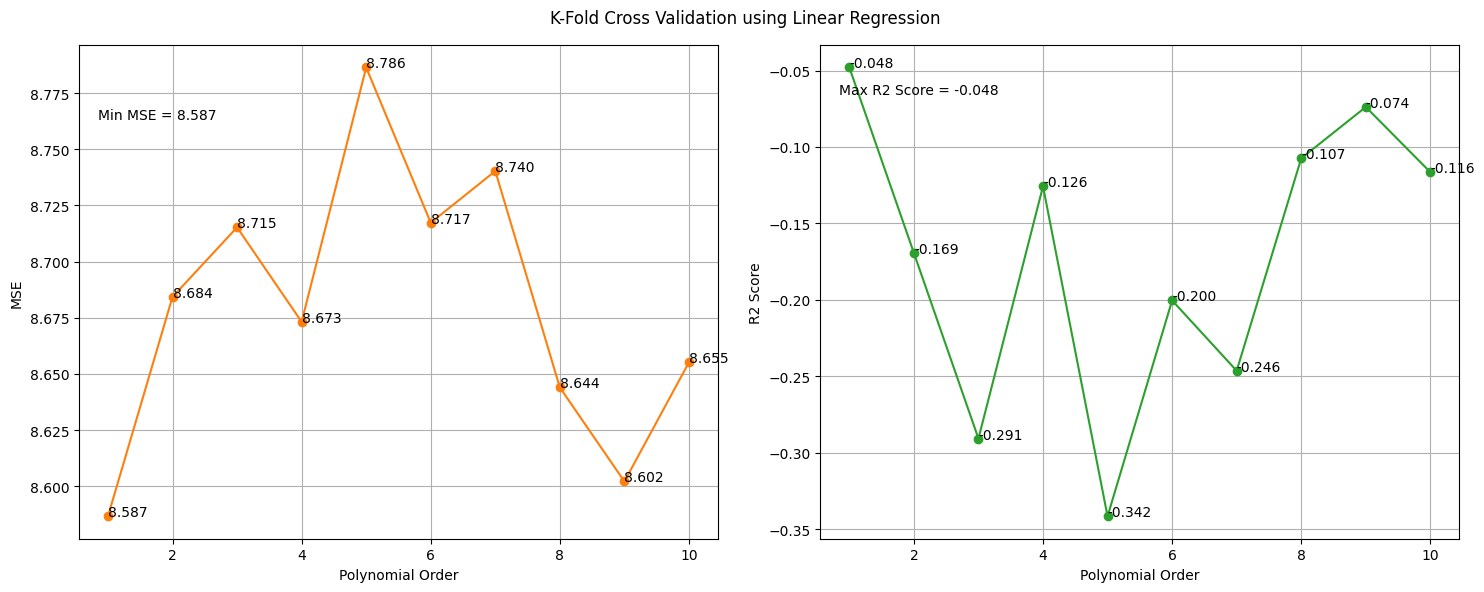

In [77]:
# Plotting untuk RMSE, MSE, dan R2 score terhadap orde polinomial untuk linear regression
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].plot(orde_list, mse_list, marker="o", color ="C1")
axes[0].set_xlabel("Polynomial Order")
axes[0].set_ylabel("MSE")
axes[0].grid(True)
for i, mse in enumerate(mse_list):
    axes[0].text(orde_list[i], mse, f"{mse:.3f}", color="black")
axes[0].text(0.03, 0.85, f"Min MSE = {np.array(mse_list).min():.3f}", transform=axes[0].transAxes)

axes[1].plot(orde_list, r2_list, marker="o", color = "C2")
axes[1].set_xlabel("Polynomial Order")
axes[1].set_ylabel("R2 Score")
axes[1].grid(True)
for i, r2 in enumerate(r2_list):
    axes[1].text(orde_list[i], r2, f"{r2:.3f}", color="black")
axes[1].text(0.03, 0.9, f"Max R2 Score = {np.array(r2_list).max():.3f}", transform=axes[1].transAxes)

plt.suptitle("K-Fold Cross Validation using Linear Regression")
plt.tight_layout()
plt.show()

In [78]:
# Pilih orde polinomial terbaik dengan nilai rata-rata MSE terkecil
print(f"Orde polinomial terbaik yaitu polinomial ber-orde: {np.argmin(mse_list)+1} dengan nilai MSE rata-rata: {np.array(mse_list).min():.3f}")

# Pilih orde polinomial terbaik dengan nilai rata-rata R2 score terbesar
print(f"Orde polinomial terbaik yaitu polinomial ber-orde: {np.argmax(r2_list)+1} dengan nilai R2 score rata-rata: {np.array(r2_list).max():.3f}")

Orde polinomial terbaik yaitu polinomial ber-orde: 1 dengan nilai MSE rata-rata: 8.587
Orde polinomial terbaik yaitu polinomial ber-orde: 1 dengan nilai R2 score rata-rata: -0.048


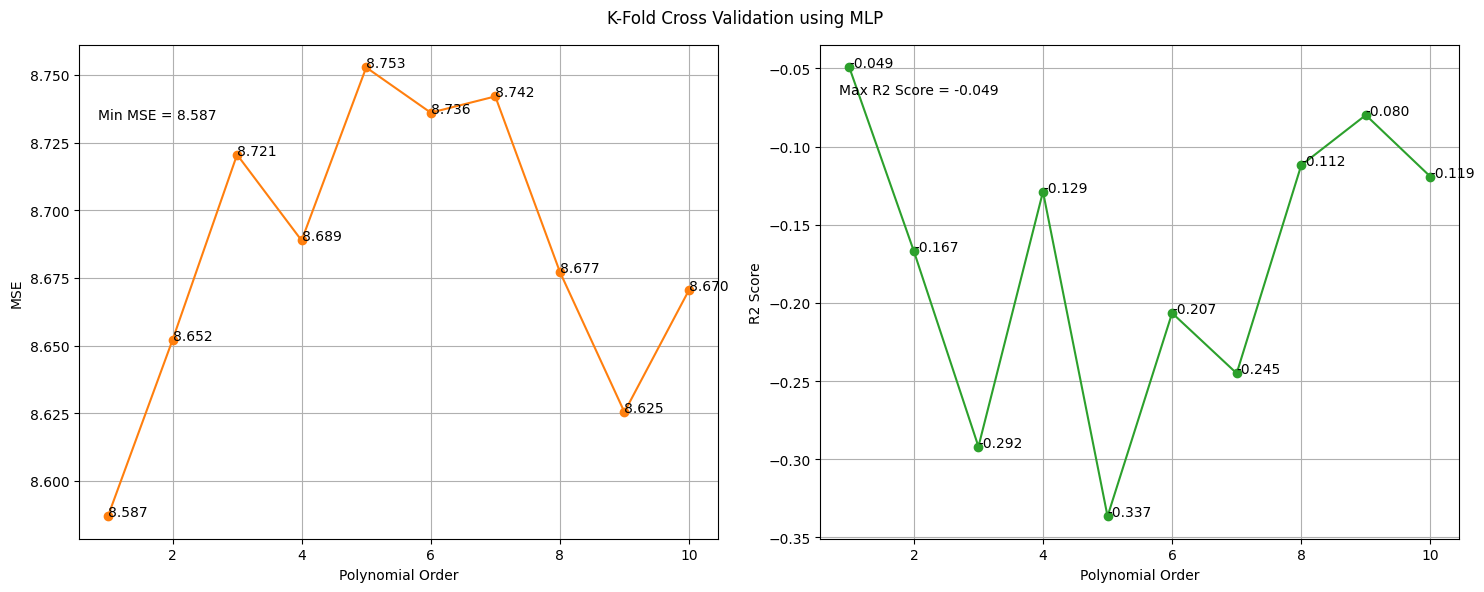

In [79]:
# Plotting untuk RMSE, MSE, dan R2 score terhadap orde polinomial untuk MLP
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].plot(orde_list2, mse_list2, marker="o", color ="C1")
axes[0].set_xlabel("Polynomial Order")
axes[0].set_ylabel("MSE")
axes[0].grid(True)
for i, mse in enumerate(mse_list2):
    axes[0].text(orde_list2[i], mse, f"{mse:.3f}", color="black")
axes[0].text(0.03, 0.85, f"Min MSE = {np.array(mse_list2).min():.3f}", transform=axes[0].transAxes)

axes[1].plot(orde_list2, r2_list2, marker="o", color = "C2")
axes[1].set_xlabel("Polynomial Order")
axes[1].set_ylabel("R2 Score")
axes[1].grid(True)
for i, r2 in enumerate(r2_list2):
    axes[1].text(orde_list2[i], r2, f"{r2:.3f}", color="black")
axes[1].text(0.03, 0.9, f"Max R2 Score = {np.array(r2_list2).max():.3f}", transform=axes[1].transAxes)

plt.suptitle("K-Fold Cross Validation using MLP")
plt.tight_layout()
plt.show()

In [80]:
# Pilih orde polinomial terbaik dengan nilai rata-rata MSE terkecil
print(f"Orde polinomial terbaik yaitu polinomial ber-orde: {np.argmin(mse_list2)+1} dengan nilai MSE rata-rata: {np.array(mse_list2).min():.3f}")

# Pilih orde polinomial terbaik dengan nilai rata-rata R2 score terbesar
print(f"Orde polinomial terbaik yaitu polinomial ber-orde: {np.argmax(r2_list2)+1} dengan nilai R2 score rata-rata: {np.array(r2_list2).max():.3f}")

Orde polinomial terbaik yaitu polinomial ber-orde: 1 dengan nilai MSE rata-rata: 8.587
Orde polinomial terbaik yaitu polinomial ber-orde: 1 dengan nilai R2 score rata-rata: -0.049


## Analisis Soal 5

Berdasarkan percobaan yang telah dilakukan, didapatkan bahwa orde polinomial terbaik diraih ketika ber-orde 1 dengan nilai `MSE rata-rata: 8.587` dan `R2 Score rata-rata: -0.048`
1. Pada dasarnya R2 score merupakan metrik yang digunakan untuk mengevaluasi kinerja model regresi linear dengan nilai yang berkisar antara 0 hingga 1, dengan nilai yang lebih tinggi menunjukkan model yang lebih baik. Namun, hasil R2 yang memiliki rata-rata negatif menunjukkan bahwa kemungkinan model yang dibuat tidak mengikuti tren data dan memiliki kesalahan yang besar. Beberapa penyebab terjadinya nilai R2 score negatif, yaitu:
    - Model tidak sesuai dengan asumsi regresi linear
    - Terjadinya overfitting atau underfitting data
    - Model memiliki variabel independen yang tidak relevan atau redundan

2. Percobaan telah dilakukan dengan memanfaatkan 2 buah model yaitu menggunakan linear regression dan MLP Regressor. Hasil yang didapatkan tetap saja yaitu di angka negatif dan angkanya berdekatan. Hal ini menunjukkan bahwa kedua model sepakat bahwa kinerja sudah baik dengan nilai seperti penjelasan pada poin 1.

# Soal 6

Pada model linear, regulasi dapat mengatasi overfitting dengan cara memodifikasi `loss function` menjadi seperti berikut.
$$
\mathcal{L}' = \mathcal{L} + \lambda \mathbf{w}^{\mathsf{T}}\mathbf{w}
$$
dengan $\lambda$ adalah suatu parameter dan $\mathcal{L}$ adalah fungsi rugi biasa (tanpa regularisasi)

Selanjutnya akan dilakukan penurunan ekspresi dari $\mathbf{w}$ yang dapat meminimumkan $\mathcal{L}'$

## Penjabaran untuk Penurunan dari $\mathbf{w}$

Dengan menggunakan definisi ini, model linear pada (@eq-model-linear-01)
menjadi
$$
f(x_n; w_0, w_1) = \mathbf{w}^{\mathsf{T}} \mathbf{x}_{n}
$$

Ekspresi untuk fungsi rugi, (@eq-loss-function-01),
menjadi:
$$
\mathcal{L} = \frac{1}{N} \sum_{n=1}^{N} \left( t_{n} - \mathbf{w}^{\mathsf{T}}
\mathbf{x}_{n} \right)^2
$$

Vektor input dapat disusun menjadi suatu matriks:
$$
\mathbf{X} = \begin{bmatrix}
\mathbf{x}^{\mathsf{T}}_{1} \\
\mathbf{x}^{\mathsf{T}}_{2} \\
\vdots \\
\mathbf{x}^{\mathsf{T}}_{N}
\end{bmatrix} =
\begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
\vdots & \vdots \\
1 & x_{N} \\
\end{bmatrix}
$$

Kita juga dapat mendefinisikan vektor target sebagai
$$
\mathbf{y} = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{bmatrix}
$$

Dengan definisi ini, kita dapat menuliskan fungsi rugi menjadi:
$$
\mathcal{L} = \frac{1}{N} \left( \mathbf{t} - \mathbf{Xw} \right)^{\mathsf{T}}
\left( \mathbf{t} - \mathbf{Xw} \right)
$$
Dengan mengalikan suku-suku dalam tanda kurung diperoleh:
$$
\begin{align}
\mathcal{L} & = \frac{1}{N} \left(
\mathbf{y}^{\mathsf{T}} \mathbf{y} +
\left(\mathbf{Xw}\right)^{\mathsf{T}} \mathbf{Xw} -
\mathbf{y}\mathbf{Xw} -
\left(\mathbf{Xw}\right)^{\mathsf{T}} \mathbf{y}
\right) \\
& = \frac{1}{N} \left(
\mathbf{w}^{\mathsf{T}} \mathbf{X}^{\mathsf{T}} \mathbf{X} \mathbf{w} -
2 \mathbf{w}^{\mathsf{T}} \mathbf{X}^{\mathsf{T}}\mathbf{y} +
\mathbf{y}^{\mathsf{T}} \mathbf{y}
\right)
\end{align}
$$

Turunan dari $\mathcal{L}$ terhadap $\mathbf{w}$ adalah
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \frac{2}{N}
\mathbf{X}^{\mathsf{T}} \mathbf{X} \mathbf{w} -
\frac{2}{N} \mathbf{X}^{\mathsf{T}} \mathbf{y} = \mathbf{0}
$$

Untuk menentukan nilai terbaik dari $\mathbf{w}$ kita dapat menggunakan
prosedur yang sama, yaitu dengan mencari solusi dari
$$
\dfrac{\partial \mathcal{L}}{\partial \mathbf{w}} = \mathbf{0}
$$
sehingga diperoleh
$$
\mathbf{X}^{\mathsf{T}} \mathbf{Xw} = \mathbf{X}^{\mathsf{T}}\mathbf{y} 
$$
Dengan menyelesaikan persamaan ini untuk $\mathbf{w}$ akhirnya diperoleh
$$
\mathbf{w} = \left(\mathbf{X}^{\mathsf{T}}\mathbf{X} \right)^{-1} \mathbf{X}^{\mathsf{T}} \mathbf{y}
$$

Hasil di atas merupakan solusi analitik untuk regresi lienar sederhana, selanjutnya akan ditambahkan regularisasi L2 ke fungsi rugi dengan memodifikasi persamaan di atas. Modifikasi yang dibutuhkan yaitu dengan menambahkan faktor lambda ke diagonala matriks $X^T X$, yaitu:
$$
\mathbf{w} = \left(\mathbf{X}^{\mathsf{T}}\mathbf{X} + \lambda I \right)^{-1} \mathbf{X}^{\mathsf{T}} \mathbf{y}
$$
dimana $I$ adalah matriks identitas dan $\lambda$ adalah parameter regularisasi.

## Implementasi Soal 6

In [81]:
# Buat fungsi untuk menghitung w dengan regularsisasi L2

def ridge_regression(X, Y, lambda_):
    return np.linalg.inv(X.T @ X + lambda_ * np.eye(X.shape[1])) @ X.T @ Y

In [82]:
# Buat data sintetik polinomial seperti pada soal 5
# Menentukan seed untuk pembangkit random number
np.random.seed(13219043)

"""Menentukan koefisien polinomial dan amplitude noise dimana koefisien polinomial diambil dari persamaan berikut."""
# (x-1)(x+1)(x-2)(x+2)(x-3)(x+3)(x-4)(x+4)(x-5)(x+5) = x^10 - 55x^8 + 1023x^6 - 7645x^4 + 21076x^2 - 14400
coef = [1, 0, -55, 0, 1023, 0, -7645, 0, 21076, 0, -14400]
noise_amp = 0.1

In [83]:
# Buat data sintetik
n = 100 # Jumlah data
x = np.linspace(-5, 5, n) # variabel independen
y_true = np.polyval(coef, x) # nilai y sebenarnya
y = y_true + noise_amp * np.random.randn(n) # nilai y yang diamati

In [84]:
# Define nilai lambda untuk regularisasi L2 dan nilai k untuk k-fold cross validation
lambdas = 0.1
k = 10

In [85]:
# Buat objek PolynomialFeatures berderajat 10
poly_lagi = PolynomialFeatures(degree=10)
X_poly = poly_lagi.fit_transform(x.reshape(-1, 1))

# Hitung w dengan fungsi ridge_regression dan nilai lambda yang telah ditentukan
w = ridge_regression(X_poly, y, lambdas)

# Prediksi target
y_pred = X_poly @ w

In [86]:
# Print nilai w
print(f"Nilai w:\n{w}")

Nilai w:
[-1.41546087e+04  1.99534492e-02  2.07668765e+04 -1.13503925e-02
 -7.56155788e+03  1.57763375e-03  1.01445916e+03 -7.72258498e-05
 -5.46300846e+01  1.22463665e-06  9.94283650e-01]


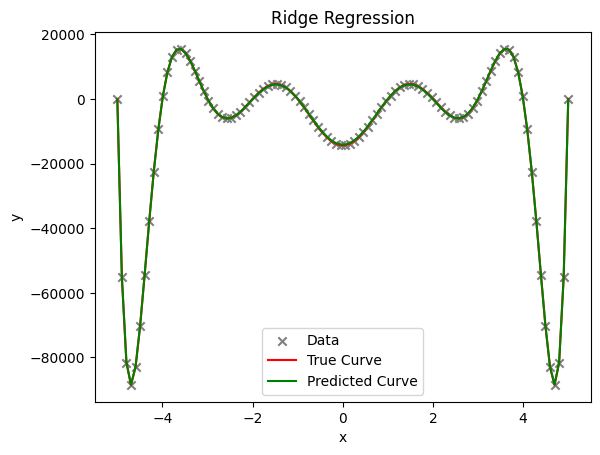

In [87]:
# Visualisasikan data dan kurva regresi
plt.scatter(x, y, marker="x", label="Data", color="grey")
plt.plot(x, y_true, color="red", label="True Curve")
plt.plot(x, y_pred, color="green", label="Predicted Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ridge Regression")
plt.legend()
plt.show()

In [88]:
# Hitung R2 Score dan MSE
print(f"R2 Score: {r2_score(y, y_pred)*100:.3f}%")
print(f"MSE: {mean_squared_error(y, y_pred):.3f}")

R2 Score: 99.998%
MSE: 10532.944


## Analisis Soal 6

Setelah dilakukan percobaan didapatkan bahwa hasil prediksi sudah sangat mendekati atau sama dengan nilai asli karena nilai $R^2$ $score$ sudah mencapai nilai $99.99$%. Dibandingkan pada percobaan Soal 1 yang hanya mencapai nilai $95.55$%. Artinya penurunan yang dilakukan pada fungsi rugi sudah sesuai dengan fungsional dari ridge regression yang dapat mengurangi nilai dari fungsi rugi $\mathcal{L}'$.

### Additional Works 
Pengaplikasian Hasil fungsi pada Soal 6 untuk meningkatkan performa pada Soal 5

In [89]:
# Buat fungsi untuk melakukan k-fold cross validation menggunakan w dengan regularisasi L2
def k_fold_cross_validation_ridge(data, k):
    folds = split_data_validation(data, k) # Bagi data menjadi k lipatan

    # Buat list untuk menyimpan koefisien dan r^2 score
    coefficents_list, r2_list, rmse_list, mse_list = [], [], [], []

    # Lakukan training dan testing untuk setiap fold
    for i in range(k):
        data_train = np.concatenate(folds[:i] + folds[i+1:], axis=0) # Gabungkan semua data kecuali fold ke-i
        data_test = folds[i] # Gunakan fold ke-i sebagai data testing

        # Pisahkan variabel independen (x) dan dependen (y) pada data pelatihan dan pengujian
        x_train = data_train[:,0].reshape(-1, 1)
        y_train = data_train[:,1]
        x_test = data_test[:,0].reshape(-1, 1)
        y_test = data_test[:,1]

        # Hitung koefisien regresi dengan regularisasi L2 pada data pelatihan
        coefficents = ridge_regression(x_train, y_train, lambdas)

        # Buat prediksi pada data pengujian dengan menggunakan koefisien regresi
        y_pred = x_test @ coefficents

        # Hitung MSE, RMSE, dan R2 score pada data pengujian
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Tambahkan koefisien regresi dan r^2 score ke daftar masing-masing
        coefficents_list.append(coefficents)
        r2_list.append(r2)
        rmse_list.append(rmse)
        mse_list.append(mse)

    # Hitung rata-rata koefisien, r^2 score, MSE, dan RMSE
    coefficents_mean = np.mean(coefficents_list, axis=0)
    r2_mean = np.mean(r2_list)
    rmse_mean = np.mean(rmse_list)
    mse_mean = np.mean(mse_list)

    return coefficents_mean, r2_mean, rmse_mean, mse_mean

In [90]:
# Aplikasikan fungsi k-fold cross validation pada data sintetik menggunakan berbagai orde polinomial sebagai fitur
# Define List untuk orde polinomial, koefisien regresi, dan r^2 score
orde_list5, coefficents_list5, r2_list5, rmse_list5, mse_list5 = [], [], [], [], []

# Lakukan k-fold cross validation untuk setiap orde polinomial
for orde in range(1, 11):
    poly5 = PolynomialFeatures(degree=orde)
    X5 = poly5.fit_transform(x.reshape(-1, 1))

    data5 = np.c_[X5, y]

    # Lakukan k-fold cross validation
    coefficents, r2, rmse, mse = k_fold_cross_validation_ridge(data5, k)

    # Tambahkan hasil ke dalam list
    orde_list5.append(orde)
    coefficents_list5.append(coefficents)
    r2_list5.append(r2)
    rmse_list5.append(rmse)
    mse_list5.append(mse)

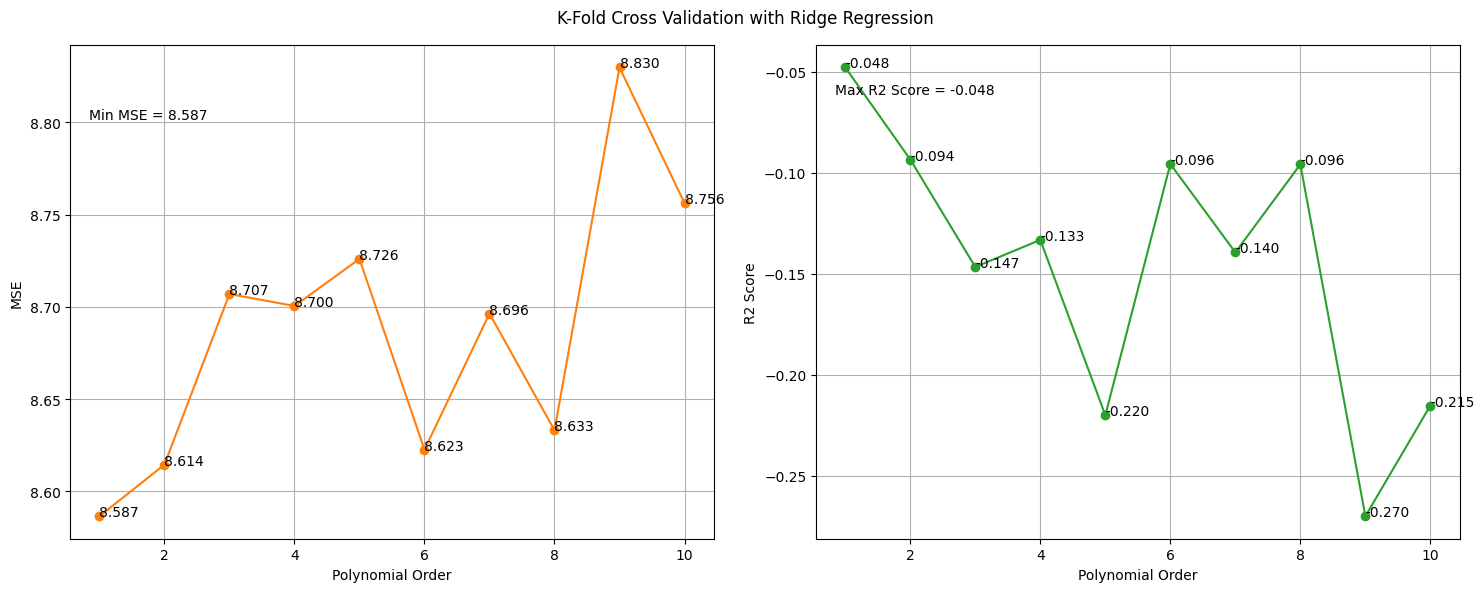

In [91]:
# Plot MSE dan R2 score terhadap orde polinomial
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].plot(orde_list5, mse_list5, marker="o", color ="C1")
axes[0].set_xlabel("Polynomial Order")
axes[0].set_ylabel("MSE")
axes[0].grid(True)
for i, mse in enumerate(mse_list5):
    axes[0].text(orde_list5[i], mse, f"{mse:.3f}", color="black")
axes[0].text(0.03, 0.85, f"Min MSE = {np.array(mse_list5).min():.3f}", transform=axes[0].transAxes)

axes[1].plot(orde_list5, r2_list5, marker="o", color = "C2")
axes[1].set_xlabel("Polynomial Order")
axes[1].set_ylabel("R2 Score")
axes[1].grid(True)
for i, r2 in enumerate(r2_list5):
    axes[1].text(orde_list5[i], r2, f"{r2:.3f}", color="black")
axes[1].text(0.03, 0.9, f"Max R2 Score = {np.array(r2_list5).max():.3f}", transform=axes[1].transAxes)

plt.suptitle("K-Fold Cross Validation with Ridge Regression")
plt.tight_layout()
plt.show()

Hasil yang didapatkan masih saja sama seperti percobaan sebelumnya dimana artinya ketika melakukan percobaan Soal 5, hasil yang didapatkan sudah merupakan hasil dengan fungsi rugi / `loss function` terkecil yang mampu dihasilkan oleh hasil prediksi `y_pred` terhadap testing data `y_test`

# Soal 7
Pemilihan dataset diambil dari kaggle untuk masalah regresi, aplikasi model linear dan non-linear.

## Penjelasan Mengenai Dataset yang Dipilih

Dataset yang digunakan adalah dataset `Medical Insurance Costs` yang didapatkan dari link GitHub berikut.

https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

Dataset tersebut terinspirasi dari buku `Machine Learning with R` oleh Brett Lantz. Data tersebut mengandung informasi medis dan biaya perawatan dari health insurance companies. Terdapat 1338 baris data yang dilengkapi beberapa fitur berikut pada bagian kolomnya:
| No. | Fitur || Detail |
|:---|:---|:---|:---|
|1.| Age |:| Usia penerima manfaat utama |
|2.| Sex |:| Jenis kelamin kontraktor asuransi (perempuan/laki-laki) |
|3.| BMI |:| Indeks massa tubuh, memberikan pemahaman tentang tubuh, indeks objektif berat badan menggunakan rasio tinggi terhadap berat badan, idealnya 18.5 hingga 24.9 |
|4.| Children |:| Jumlah anak yang ditanggung oleh asuransi kesehatan / Jumlah tanggungan |
|5.| Smoker |:| Status penerima manfaat, apakah perokok atau tidak |
|6.| Region |:| Daerah pemukiman penerima manfaat |
|7.| Charges |:| Biaya medis yang ditagih oleh asuransi kesehatan |

Dalam pengerjaan Soal 7 ini, pemodelan menggunakan regresi linear dan non-linear akan dimanfaatkan `untuk memprediksi insurance costs yang perlu dibayarkan oleh seseorang dengan kriteria yang dimilikinya`.

## Implementasi Soal 7

In [92]:
# Mengimport library yang dibutuhkan
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import plotly.express as px

In [93]:
# Pertama, membaca dataset dari file insurance.csv
df_soal7 = pd.read_csv("insurance.csv")

### Exploratory Data Analysis

In [94]:
# Menampilkan 10 data pertama
df_soal7.head(10)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

In [95]:
# Menampilkan informasi dataset
df_soal7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

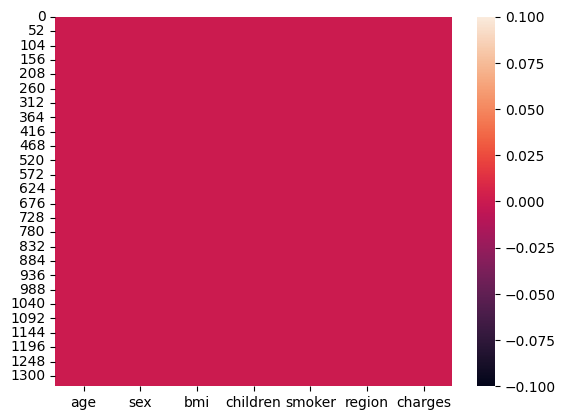

In [96]:
sns.heatmap(df_soal7.isna())

Melihat bahwa setiap data memiliki jumlah yang sama, maka dapat disimpulkan bahwa tidak ada data kosong pada dataset yang digunakan

In [97]:
# Selanjutnya kita coba perhatikan jumlah unique value dari tiap data
for col in df_soal7.columns:
    if len(df_soal7[col].unique()) < 10:
        print(f"Total unique values of {col}: {len(df_soal7[col].unique())} --> {df_soal7[col].unique()}")
    else:
        print(f"Total unique values of {col}: {len(df_soal7[col].unique())}")

Total unique values of age: 47
Total unique values of sex: 2 --> ['female' 'male']
Total unique values of bmi: 548
Total unique values of children: 6 --> [0 1 3 2 5 4]
Total unique values of smoker: 2 --> ['yes' 'no']
Total unique values of region: 4 --> ['southwest' 'southeast' 'northwest' 'northeast']
Total unique values of charges: 1337


#### Penjelasan:
1. Perhatikan bahwa unique values of smoker yaitu berupa jawaban yes or no dan kita dapat mengubahnya menjadi 1 untuk yes dan 0 untuk no
2. Poin nomor 1 tidak dapat diterapkan pada fitur sex karena female dan male memiliki derajat yang sama (urutan data tidak berpengaruh) dalam Machine Learning sehingga tidak boleh direplace dengan angka 1 dan 0 yang menandakan terdapat perbedaan derajat ketika diproses. Oleh karena itu, digunakan one hot encoding untuk memisahkan fitur tersebut. Namun, ditambah dengan pertimbangan bahwa data hanya untuk diregresi dan juga tidak terdapat data kosong yang menyebabkan adanya 3 kemungkinan sehingga menyebabkan data bersifat binary, maka untuk case ini gender male akan dimapping bernilai 1 dan female menjadi 0 untuk memudahkan data processing.
3. One hot encoding akan diterapkan pada fitur region.

### Feature Engineering

In [98]:
# Ubah data smoker dari categorical menjadi numerical dimana 1 = smoker dan 0 = non-smoker
df_soal7["smoker"] = df_soal7["smoker"].map({"yes": 1, "no": 0})

# Ubah data sex dari categorical menjadi numerical dimana 1 = male dan 0 = female
df_soal7["sex"] = df_soal7["sex"].map({"male": 1, "female": 0})

In [99]:
# Dapatkan kolom label dan kolom categorical
label_column = ["charges"]
categorical_columns = df_soal7.select_dtypes(include='object').columns.to_list()
categorical_columns = [col for col in categorical_columns if col not in label_column]

In [100]:
df_soal7_2 = df_soal7.copy()
df_soal7_2 = pd.get_dummies(df_soal7, columns=categorical_columns)

In [101]:
df_soal7_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   bool   
 7   region_northwest  1338 non-null   bool   
 8   region_southeast  1338 non-null   bool   
 9   region_southwest  1338 non-null   bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 68.1 KB


In [102]:
# ubah 5 kolom terakhir menjadi data numerikal 
for col in df_soal7_2.columns[-4:]:
    df_soal7_2[col] = df_soal7_2[col].astype("int64")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'region_northeast'}>,
        <Axes: title={'center': 'region_northwest'}>,
        <Axes: title={'center': 'region_southeast'}>],
       [<Axes: title={'center': 'region_southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

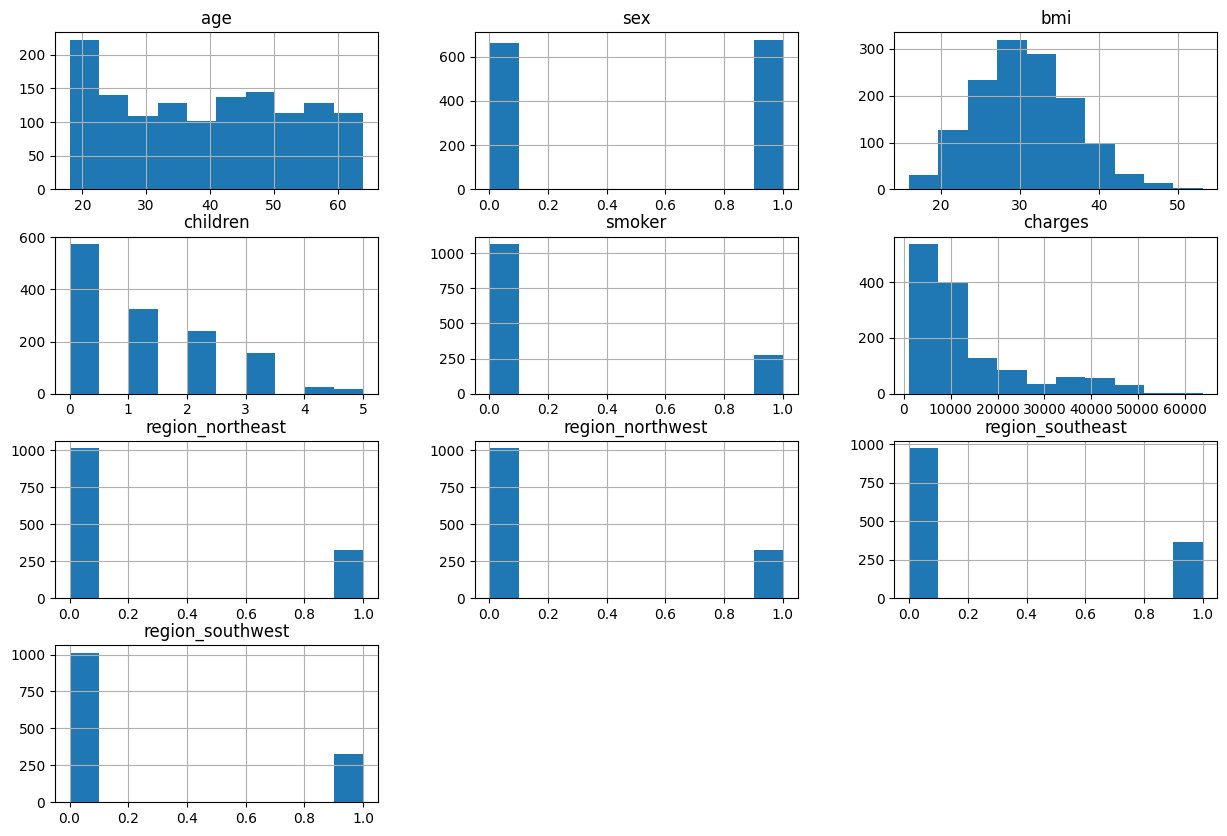

In [103]:
df_soal7_2.hist(figsize=(15,10))

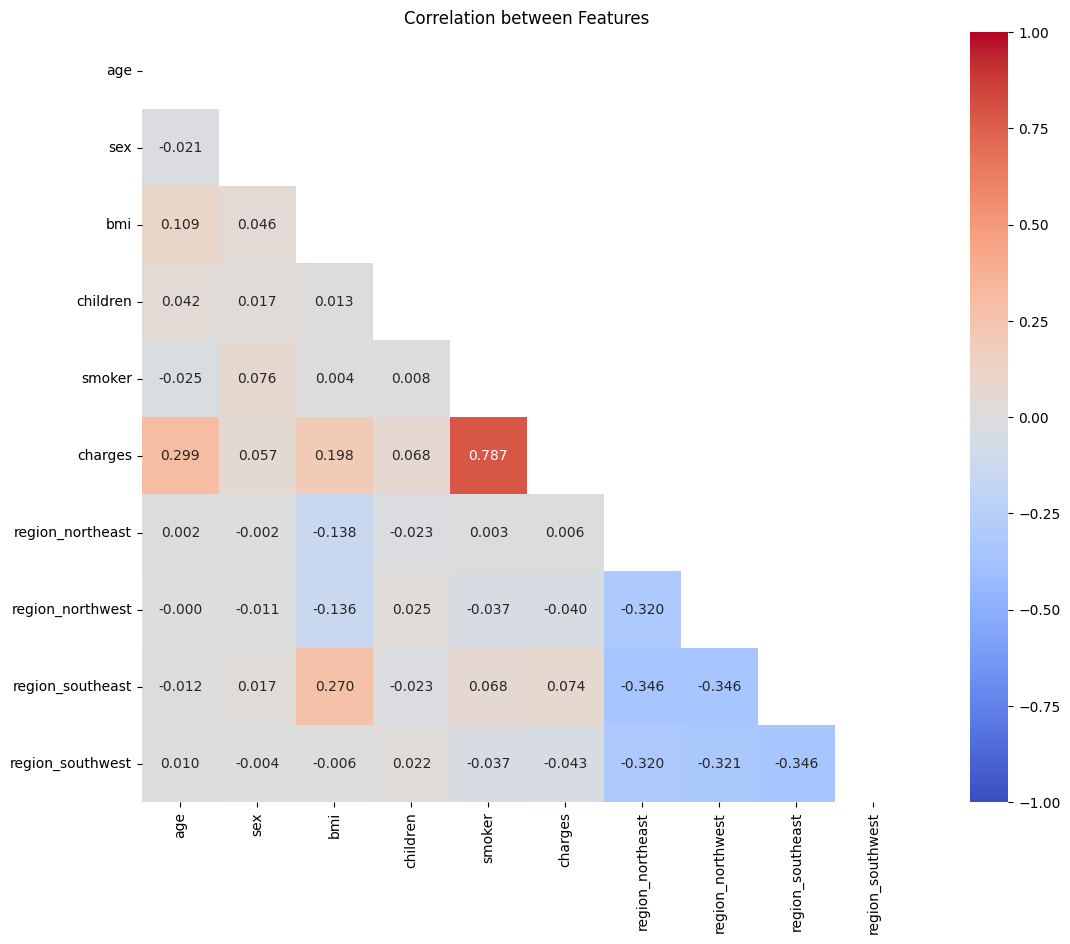

In [104]:
# Melakukan pengecekan korelasi antar kolom dan membuat relational map
corr_column = df_soal7_2.select_dtypes(include=[np.number]).columns.to_list()

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.set_title("Correlation between Features")

mask = np.triu(np.ones_like(df_soal7_2[corr_column].corr(), dtype=bool))

sns.heatmap(df_soal7_2[corr_column].corr(), 
            vmin=-1, vmax=1, mask=mask, annot=True, fmt=".3f", 
            cmap="coolwarm", ax=ax, square=True, annot_kws={"fontsize": 10})

plt.show()

In [105]:
# Visual Representasi lainnya
score_corr = df_soal7_2[corr_column].corr()
score_corr.style.background_gradient(cmap="coolwarm")

Dari hasil korelasi diatas, dapat dilihat bahwa kolom smoker memiliki korelasi yang cukup tinggi dengan kolom charges

In [106]:
# Memilih semua fitur selain charges sebagai fitur
features = df_soal7_2.drop(columns=["charges"]).columns.to_list()

In [107]:
# Mencari korelasi terbaik untuk menentukan charge
corr_ranks = {}

# Menghitung korelasi antara charges dengan fitur yang dipilih
for col in features:
    corr_ranks[col] = df_soal7_2["charges"].corr(df_soal7_2[col])

corr_rank_series = pd.Series(corr_ranks)

# Mengambil nilai korelasi terbaik
top = corr_rank_series.nlargest(len(features))
top_df = top.to_frame()

top_df.columns = ["Correlation"]

# Menampilkan hasil dalam bentuk tabel dengan format dan warna tertentu
print("Top Correlations:")
display(top_df.style.format("{:.3f}").background_gradient(cmap="coolwarm"))

Top Correlations:


Berdasarkan tabel di atas, terlihat bahwa harga sangat bergantung dengan apakah seseorang tersebut merupakan seorang smoker atau tidak, lalu diikuti oleh umur dan bmi-nya bagaimana.

### Plot Distribution

In [108]:
# Plot distribusi charges menggunakan px
fig = px.histogram(df_soal7_2, x="charges", marginal="box", title="Distribution of Charges")
fig.update_layout(bargap=0.1)
fig.show()

### Implementasi Soal 7

#### Implementasi Regresi Linear: Linear Regression

In [109]:
x_soal7 = df_soal7_2.drop(columns=["charges"], axis = 1)
y_soal7 = df_soal7_2["charges"]
x_train_soal7, x_test_soal7, y_train_soal7, y_test_soal7 = train_test_split(x_soal7, y_soal7, test_size=0.3, random_state=13219043)
lin_reg_soal7 = LinearRegression().fit(x_train_soal7, y_train_soal7)

# Print koefisien dan intercept
print("Koefisien:")
print(lin_reg_soal7.coef_)
print("Intercept:", end="")
print(lin_reg_soal7.intercept_)

Koefisien:
[  252.42495917  -325.24467921   312.710769     579.02805197
 24079.6317624    345.06679319    84.79948078  -401.51748274
   -28.34879123]
Intercept:-11619.83957190714


In [110]:
# Prediksi target
y_pred_lin_reg_soal7 = lin_reg_soal7.predict(x_test_soal7)

# Hitung R2 score dan RMSE
r2_lin_reg_soal7 = r2_score(y_test_soal7, y_pred_lin_reg_soal7)
rmse_lin_reg_soal7 = np.sqrt(mean_squared_error(y_test_soal7, y_pred_lin_reg_soal7))

# Print R2 score dan RMSE
print(f"R2 Score: {(r2_lin_reg_soal7)*100:.2f}%")
print(f"RMSE: {rmse_lin_reg_soal7:.2f}")

R2 Score: 74.18%
RMSE: 6011.25


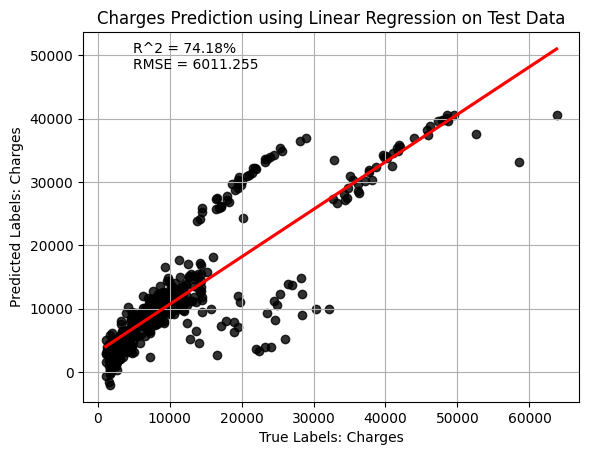

In [111]:
sns.regplot(x=y_test_soal7, y=y_pred_lin_reg_soal7, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlabel("True Labels: Charges")
plt.ylabel("Predicted Labels: Charges")
plt.title("Charges Prediction using Linear Regression on Test Data")
plt.grid(True)
# print r2 score
plt.text(0.1, 0.9, f"R^2 = {(r2_lin_reg_soal7)*100:.2f}%\nRMSE = {rmse_lin_reg_soal7:.3f}", transform=plt.gca().transAxes)
plt.show()

#### Implementasi Regresi Linear: Rigde Regression

In [112]:
ridge_reg = Ridge(alpha=0.8).fit(x_train_soal7, y_train_soal7)

# Print koefisien dan intercept
print("Koefisien:")
print(ridge_reg.coef_)
print("Intercept:", end="")
print(ridge_reg.intercept_)
print("")
# Hitung dan Print R2 score dan RMSE
y_pred_ridge_reg = ridge_reg.predict(x_test_soal7)
r2_ridge_reg = r2_score(y_test_soal7, y_pred_ridge_reg)
rmse_ridge_reg = np.sqrt(mean_squared_error(y_test_soal7, y_pred_ridge_reg))
print(f"R2 Score: {(r2_ridge_reg)*100:.2f}%")
print(f"RMSE: {rmse_ridge_reg:.2f}")

Koefisien:
[  252.33601563  -312.8764914    312.53488929   579.80228258
 23953.27783279   343.82570418    80.49698007  -393.90655007
   -30.41613418]
Intercept:-11591.95821812442

R2 Score: 74.20%
RMSE: 6008.90


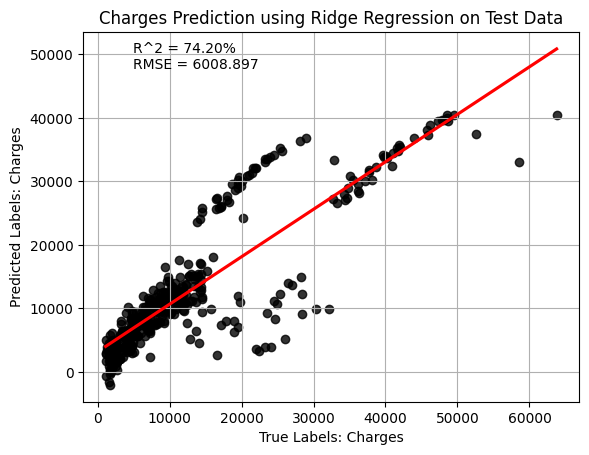

In [113]:
sns.regplot(x=y_test_soal7, y=y_pred_ridge_reg, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlabel("True Labels: Charges")
plt.ylabel("Predicted Labels: Charges")
plt.title("Charges Prediction using Ridge Regression on Test Data")
plt.grid(True)
# print r2 score
plt.text(0.1, 0.9, f"R^2 = {(r2_ridge_reg)*100:.2f}%\nRMSE = {rmse_ridge_reg:.3f}", transform=plt.gca().transAxes)
plt.show()

#### Implementasi Non-Linear: Polynomial Regression Model

In [114]:
# Buat model Polynomial Regression Model dari degree 1 hingga 10
poly_reg_models = []
r2_score_poly_list_soal7, rmse_score_poly_list_soal7 = [], []
for deg in range(1, 11):
    # Hitung r2 score dan rmse untuk tiap degree
    poly_reg = PolynomialFeatures(degree=deg)
    x_poly_train = poly_reg.fit_transform(x_train_soal7)
    x_poly_test = poly_reg.fit_transform(x_test_soal7)
    poly_reg_model = LinearRegression().fit(x_poly_train, y_train_soal7)
    poly_reg_models.append(poly_reg_model)
    y_pred_poly = poly_reg_model.predict(x_poly_test)
    r2_score_poly = r2_score(y_test_soal7, y_pred_poly)
    rmse_score_poly = np.sqrt(mean_squared_error(y_test_soal7, y_pred_poly))
    r2_score_poly_list_soal7.append(r2_score_poly)
    rmse_score_poly_list_soal7.append(rmse_score_poly)


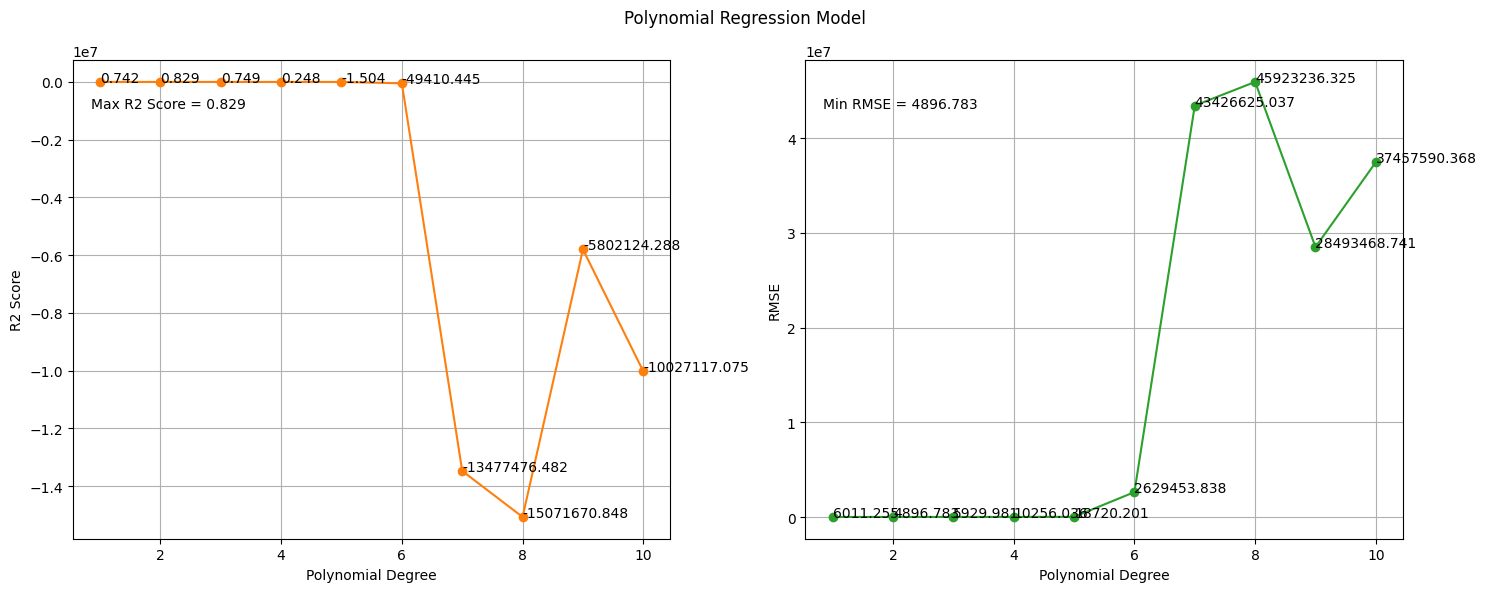

In [115]:
# Plotting R2 score dan RMSE terhadap degree
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].plot(range(1, 11), r2_score_poly_list_soal7, marker="o", color ="C1")
axes[0].set_xlabel("Polynomial Degree")
axes[0].set_ylabel("R2 Score")
axes[0].grid(True)
for i, r2 in enumerate(r2_score_poly_list_soal7):
    axes[0].text(i+1, r2, f"{r2:.3f}", color="black")
axes[0].text(0.03, 0.9, f"Max R2 Score = {np.array(r2_score_poly_list_soal7).max():.3f}", transform=axes[0].transAxes)

axes[1].plot(range(1, 11), rmse_score_poly_list_soal7, marker="o", color = "C2")
axes[1].set_xlabel("Polynomial Degree")
axes[1].set_ylabel("RMSE")
axes[1].grid(True)
for i, rmse in enumerate(rmse_score_poly_list_soal7):
    axes[1].text(i+1, rmse, f"{rmse:.3f}", color="black")
axes[1].text(0.03, 0.9, f"Min RMSE = {np.array(rmse_score_poly_list_soal7).min():.3f}", transform=axes[1].transAxes)

plt.suptitle("Polynomial Regression Model")
plt.tight_layout()
plt.show()

In [116]:
# Pilih model dengan nilai r2 score terbesar dan rmse terkecil
best_poly_reg_model = poly_reg_models[np.argmax(r2_score_poly_list_soal7)]
best_poly_reg_model_deg = np.argmax(r2_score_poly_list_soal7) + 1
print(f"Best Polynomial Regression Model: Degree {best_poly_reg_model_deg}")

Best Polynomial Regression Model: Degree 2


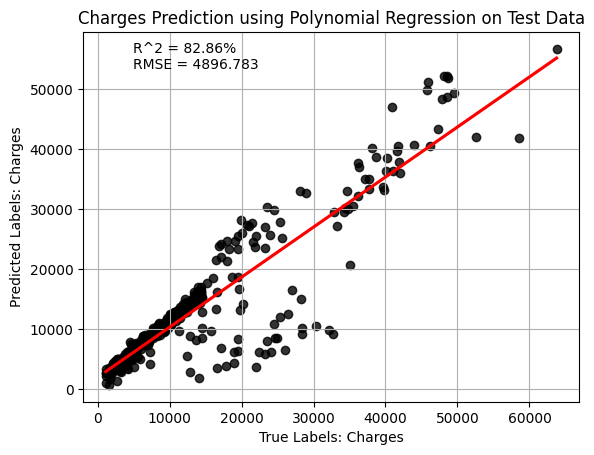

In [117]:
# Plotting hasil prediksi model terbaik
x_quad = PolynomialFeatures(degree=best_poly_reg_model_deg).fit_transform(x_test_soal7)
y_pred_best_poly = best_poly_reg_model.predict(x_quad)

sns.regplot(x=y_test_soal7, y=y_pred_best_poly, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlabel("True Labels: Charges")
plt.ylabel("Predicted Labels: Charges")
plt.title("Charges Prediction using Polynomial Regression on Test Data")
plt.grid(True)
# print r2 score
plt.text(0.1, 0.9, f"R^2 = {(r2_score(y_test_soal7, y_pred_best_poly))*100:.2f}%\nRMSE = {np.sqrt(mean_squared_error(y_test_soal7, y_pred_best_poly)):.3f}", transform=plt.gca().transAxes)
plt.show()

#### Implementasi Non-Linear: Random Forest Regression

In [118]:
# Buat model Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=13219043).fit(x_train_soal7, y_train_soal7)

rf_train_pred = rf_reg.predict(x_train_soal7)
rf_test_pred = rf_reg.predict(x_test_soal7)

# Hitung R2 score dan RMSE
r2_rf_train = r2_score(y_train_soal7, rf_train_pred)
r2_rf_test = r2_score(y_test_soal7, rf_test_pred)
rmse_rf_train = np.sqrt(mean_squared_error(y_train_soal7, rf_train_pred))
rmse_rf_test = np.sqrt(mean_squared_error(y_test_soal7, rf_test_pred))

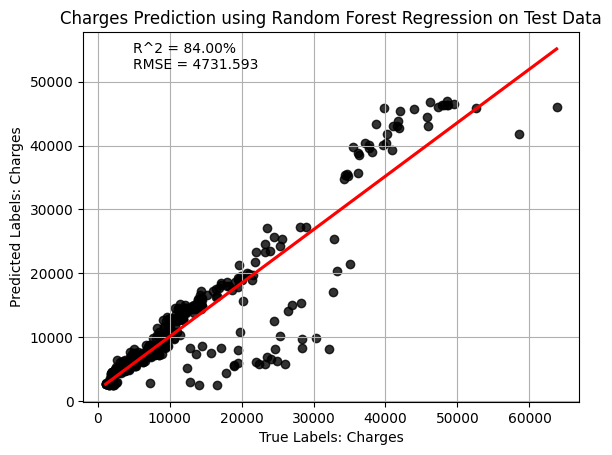

In [119]:
sns.regplot(x=y_test_soal7, y=rf_test_pred, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlabel("True Labels: Charges")
plt.ylabel("Predicted Labels: Charges")
plt.title("Charges Prediction using Random Forest Regression on Test Data")
plt.grid(True)
# print r2 score
plt.text(0.1, 0.9, f"R^2 = {(r2_rf_test)*100:.2f}%\nRMSE = {rmse_rf_test:.3f}", transform=plt.gca().transAxes)
plt.show()

### Implementasi Non-Linear: Gradient Boosting Regression

In [120]:
# Buat model Gradient Boosting Regression
gb_reg = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=13219043).fit(x_train_soal7, y_train_soal7)

gb_train_pred = gb_reg.predict(x_train_soal7)
gb_test_pred = gb_reg.predict(x_test_soal7)

# Hitung R2 score dan RMSE
r2_gb_train = r2_score(y_train_soal7, gb_train_pred)
r2_gb_test = r2_score(y_test_soal7, gb_test_pred)
rmse_gb_train = np.sqrt(mean_squared_error(y_train_soal7, gb_train_pred))
rmse_gb_test = np.sqrt(mean_squared_error(y_test_soal7, gb_test_pred))

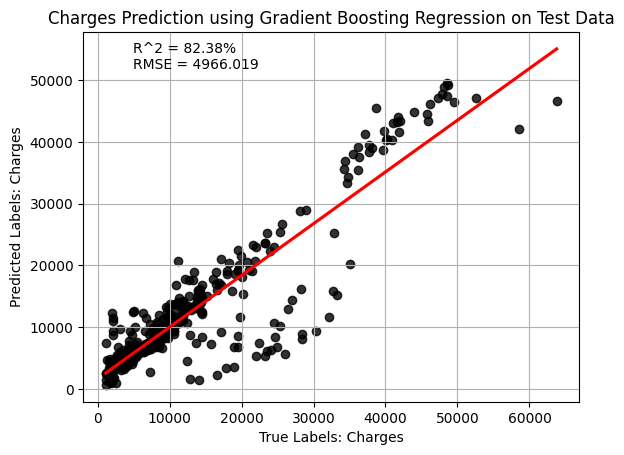

In [121]:
# Plotting Data dan hasil prediksi
sns.regplot(x=y_test_soal7, y=gb_test_pred, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlabel("True Labels: Charges")
plt.ylabel("Predicted Labels: Charges")
plt.title("Charges Prediction using Gradient Boosting Regression on Test Data")
plt.grid(True)
# print r2 score
plt.text(0.1, 0.9, f"R^2 = {(r2_gb_test)*100:.2f}%\nRMSE = {rmse_gb_test:.3f}", transform=plt.gca().transAxes)
plt.show()

In [122]:
# Buat model Decision Tree Regression
dt_reg = DecisionTreeRegressor(max_depth=5, random_state=13219043).fit(x_train_soal7, y_train_soal7)

dt_train_pred = dt_reg.predict(x_train_soal7)
dt_test_pred = dt_reg.predict(x_test_soal7)

# Hitung R2 score dan RMSE
r2_dt_train = r2_score(y_train_soal7, dt_train_pred)
r2_dt_test = r2_score(y_test_soal7, dt_test_pred)

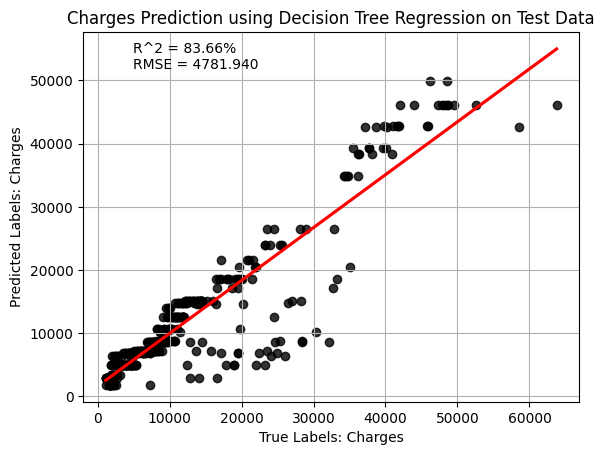

In [123]:
# Plotting Data dan hasil prediksi
sns.regplot(x=y_test_soal7, y=dt_test_pred, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlabel("True Labels: Charges")
plt.ylabel("Predicted Labels: Charges")
plt.title("Charges Prediction using Decision Tree Regression on Test Data")
plt.grid(True)
# print r2 score
plt.text(0.1, 0.9, f"R^2 = {(r2_dt_test)*100:.2f}%\nRMSE = {np.sqrt(mean_squared_error(y_test_soal7, dt_test_pred)):.3f}", transform=plt.gca().transAxes)
plt.show()

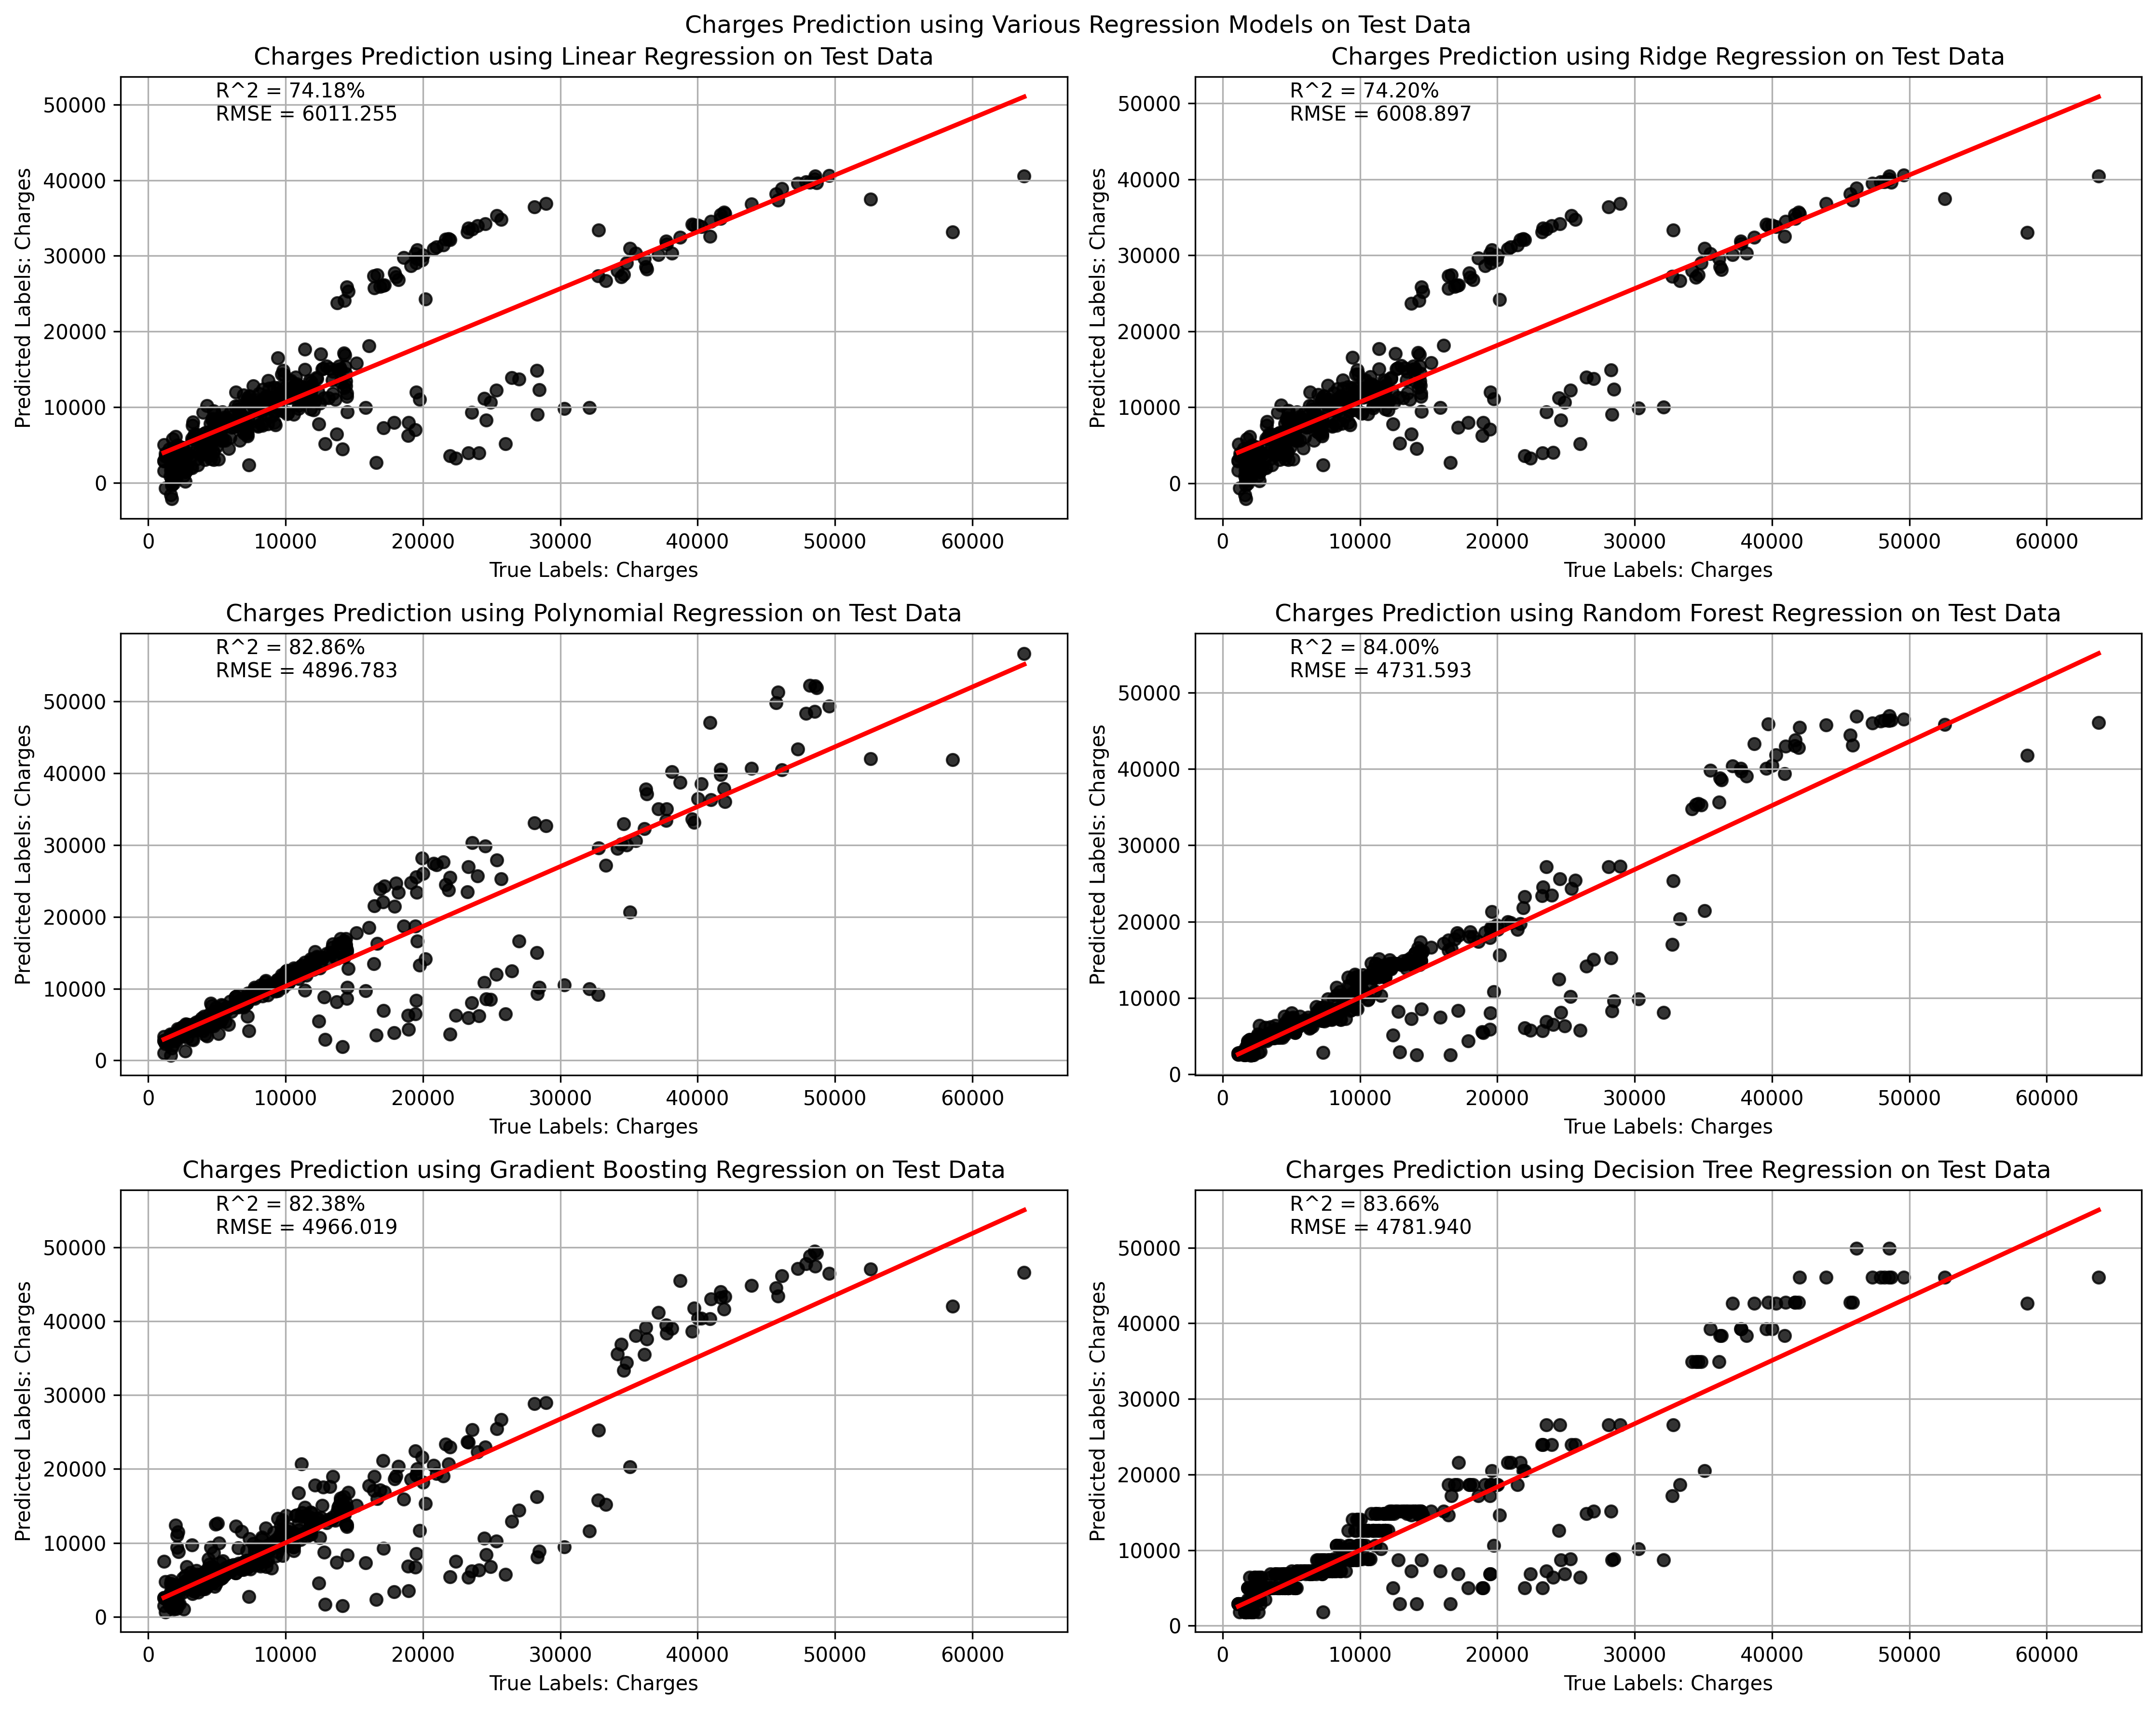

In [124]:
# Plot keseluruhan model dalam 1 gambar menggunakan subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12), dpi=300)

# Plot Linear Regression
sns.regplot(x=y_test_soal7, y=y_pred_lin_reg_soal7, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axes[0,0])
axes[0,0].set_xlabel("True Labels: Charges")
axes[0,0].set_ylabel("Predicted Labels: Charges")
axes[0,0].set_title("Charges Prediction using Linear Regression on Test Data")
axes[0,0].text(0.1, 0.9, f"R^2 = {(r2_lin_reg_soal7)*100:.2f}%\nRMSE = {rmse_lin_reg_soal7:.3f}", transform=axes[0,0].transAxes)
axes[0,0].grid(True)

# Plot Ridge Regression
sns.regplot(x=y_test_soal7, y=y_pred_ridge_reg, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axes[0,1])
axes[0,1].set_xlabel("True Labels: Charges")
axes[0,1].set_ylabel("Predicted Labels: Charges")
axes[0,1].set_title("Charges Prediction using Ridge Regression on Test Data")
axes[0,1].text(0.1, 0.9, f"R^2 = {(r2_ridge_reg)*100:.2f}%\nRMSE = {rmse_ridge_reg:.3f}", transform=axes[0,1].transAxes)
axes[0,1].grid(True)

# Plot Polynomial Regression
sns.regplot(x=y_test_soal7, y=y_pred_best_poly, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axes[1,0])
axes[1,0].set_xlabel("True Labels: Charges")
axes[1,0].set_ylabel("Predicted Labels: Charges")
axes[1,0].set_title("Charges Prediction using Polynomial Regression on Test Data")
axes[1,0].text(0.1, 0.9, f"R^2 = {(r2_score(y_test_soal7, y_pred_best_poly))*100:.2f}%\nRMSE = {np.sqrt(mean_squared_error(y_test_soal7, y_pred_best_poly)):.3f}", transform=axes[1,0].transAxes)
axes[1,0].grid(True)

# Plot Random Forest Regression
sns.regplot(x=y_test_soal7, y=rf_test_pred, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axes[1,1])
axes[1,1].set_xlabel("True Labels: Charges")
axes[1,1].set_ylabel("Predicted Labels: Charges")
axes[1,1].set_title("Charges Prediction using Random Forest Regression on Test Data")
axes[1,1].text(0.1, 0.9, f"R^2 = {(r2_rf_test)*100:.2f}%\nRMSE = {rmse_rf_test:.3f}", transform=axes[1,1].transAxes)
axes[1,1].grid(True)

# Plot Gradient Boosting Regression
sns.regplot(x=y_test_soal7, y=gb_test_pred, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axes[2,0])
axes[2,0].set_xlabel("True Labels: Charges")
axes[2,0].set_ylabel("Predicted Labels: Charges")
axes[2,0].set_title("Charges Prediction using Gradient Boosting Regression on Test Data")
axes[2,0].text(0.1, 0.9, f"R^2 = {(r2_gb_test)*100:.2f}%\nRMSE = {rmse_gb_test:.3f}", transform=axes[2,0].transAxes)
axes[2,0].grid(True)

# Plot Decision Tree Regression
sns.regplot(x=y_test_soal7, y=dt_test_pred, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axes[2,1])
axes[2,1].set_xlabel("True Labels: Charges")
axes[2,1].set_ylabel("Predicted Labels: Charges")
axes[2,1].set_title("Charges Prediction using Decision Tree Regression on Test Data")
axes[2,1].text(0.1, 0.9, f"R^2 = {(r2_dt_test)*100:.2f}%\nRMSE = {np.sqrt(mean_squared_error(y_test_soal7, dt_test_pred)):.3f}", transform=axes[2,1].transAxes)
axes[2,1].grid(True)

plt.suptitle("Charges Prediction using Various Regression Models on Test Data")
plt.tight_layout()
plt.show()


In [125]:
# Buat tabel untuk menyimpan hasil evaluasi r2 score dan rmse tiap model dan tampilkan
eval_table = pd.DataFrame({"Model": ["Linear Regression", "Ridge Regression", "Polynomial Regression", "Random Forest Regression", "Gradient Boosting Regression", "Decision Tree Regression"],
                            "R2 Score": [r2_lin_reg_soal7, r2_ridge_reg, r2_score(y_test_soal7, y_pred_best_poly), r2_rf_test, r2_gb_test, r2_dt_test],
                            "RMSE": [rmse_lin_reg_soal7, rmse_ridge_reg, np.sqrt(mean_squared_error(y_test_soal7, y_pred_best_poly)), rmse_rf_test, rmse_gb_test, np.sqrt(mean_squared_error(y_test_soal7, dt_test_pred))]})

# Urutkan tabel berdasarkan nilai r2 score dari yang terbesar dan tambahkan ranking
eval_table = eval_table.sort_values(by="R2 Score", ascending=False)
eval_table["Rank"] = range(1, len(eval_table)+1)
eval_table.set_index("Rank", inplace=True)
eval_table.style.background_gradient(cmap="coolwarm")

#### Memprediksi dengan melakukan scaling feature terlebih dahulu

In [126]:
# Melakukan Standard Scaler pada data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_soal7)
x_scaled = pd.DataFrame(x_scaled, columns=x_soal7.columns)

In [127]:
# Membuat data train dan test dari data yang telah di-scaling
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y_soal7, test_size=0.3, random_state=13219043)

In [128]:
# Buat model Linear Regression
lin_reg_soal7_scaled = LinearRegression().fit(x_train_scaled, y_train_scaled)

# Buat model Ridge Regression
ridge_reg_scaled = Ridge(alpha=0.8).fit(x_train_scaled, y_train_scaled)

# Buat model Polynomial Regression untuk degree 2
poly_reg_scaled = PolynomialFeatures(degree=2)
x_poly_train_scaled = poly_reg_scaled.fit_transform(x_train_scaled)
x_poly_test_scaled = poly_reg_scaled.fit_transform(x_test_scaled)
poly_reg_model_scaled = LinearRegression().fit(x_poly_train_scaled, y_train_scaled)

# Buat model Random Forest Regression
rf_reg_scaled = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=13219043).fit(x_train_scaled, y_train_scaled)

# Buat model Gradient Boosting Regression
gb_reg_scaled = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=13219043).fit(x_train_scaled, y_train_scaled)

# Buat model Decision Tree Regression
dt_reg_scaled = DecisionTreeRegressor(max_depth=5, random_state=13219043).fit(x_train_scaled, y_train_scaled)

In [129]:
# Prediksi target menggunakan setiap model
y_pred_lin_reg_soal7_scaled = lin_reg_soal7_scaled.predict(x_test_scaled)
y_pred_ridge_reg_scaled = ridge_reg_scaled.predict(x_test_scaled)
y_pred_poly_scaled = poly_reg_model_scaled.predict(x_poly_test_scaled)
y_pred_rf_scaled = rf_reg_scaled.predict(x_test_scaled)
y_pred_gb_scaled = gb_reg_scaled.predict(x_test_scaled)
y_pred_dt_scaled = dt_reg_scaled.predict(x_test_scaled)

In [130]:
# Hitung R2 score dan RMSE
r2_lin_reg_soal7_scaled = r2_score(y_test_scaled, y_pred_lin_reg_soal7_scaled)
r2_ridge_reg_scaled = r2_score(y_test_scaled, y_pred_ridge_reg_scaled)
r2_poly_scaled = r2_score(y_test_scaled, y_pred_poly_scaled)
r2_rf_scaled = r2_score(y_test_scaled, y_pred_rf_scaled)
r2_gb_scaled = r2_score(y_test_scaled, y_pred_gb_scaled)  
r2_dt_scaled = r2_score(y_test_scaled, y_pred_dt_scaled)

rmse_lin_reg_soal7_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_lin_reg_soal7_scaled))
rmse_ridge_reg_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_ridge_reg_scaled))
rmse_poly_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_poly_scaled))
rmse_rf_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_rf_scaled))
rmse_gb_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_gb_scaled))
rmse_dt_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_dt_scaled))

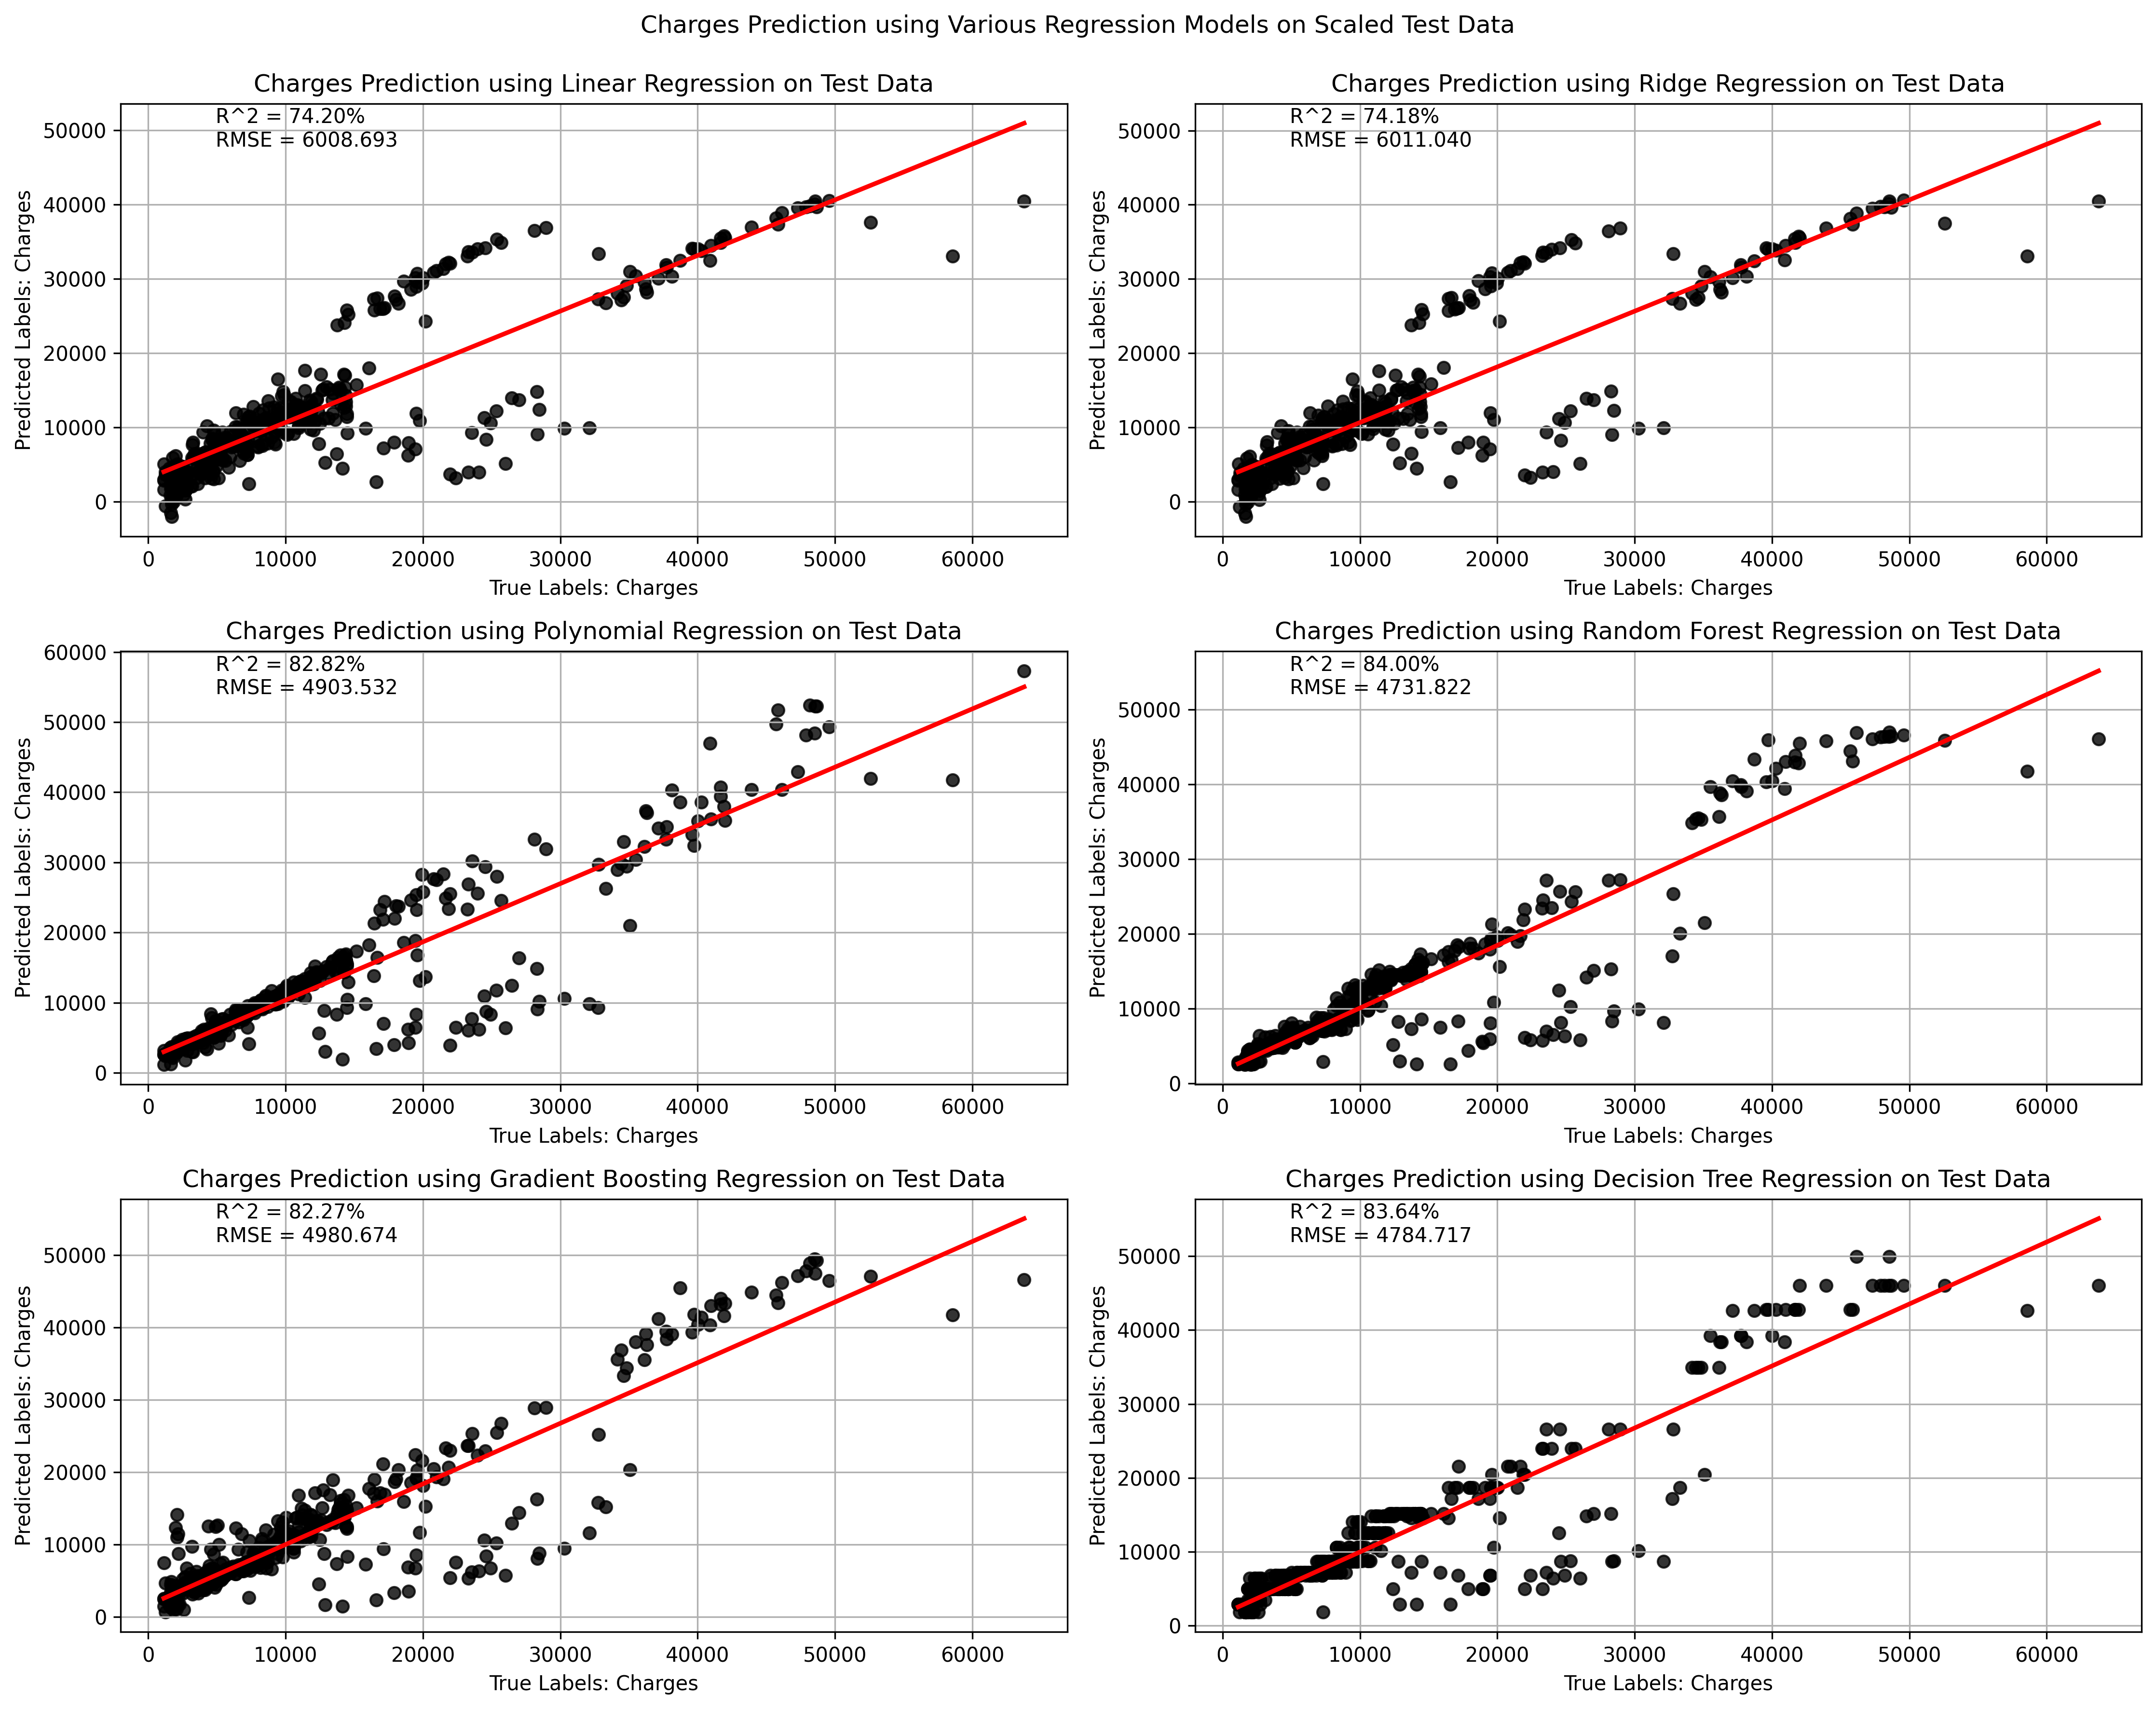

In [131]:
# Plotting Data dan hasil prediksi untuk setiap model
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12), dpi=300)

# Plot Linear Regression
sns.regplot(x=y_test_scaled, y=y_pred_lin_reg_soal7_scaled, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axes[0,0])
axes[0,0].set_xlabel("True Labels: Charges")
axes[0,0].set_ylabel("Predicted Labels: Charges")
axes[0,0].set_title("Charges Prediction using Linear Regression on Test Data")
axes[0,0].text(0.1, 0.9, f"R^2 = {(r2_lin_reg_soal7_scaled)*100:.2f}%\nRMSE = {rmse_lin_reg_soal7_scaled:.3f}", transform=axes[0,0].transAxes)
axes[0,0].grid(True)

# Plot Ridge Regression
sns.regplot(x=y_test_scaled, y=y_pred_ridge_reg_scaled, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axes[0,1])
axes[0,1].set_xlabel("True Labels: Charges")
axes[0,1].set_ylabel("Predicted Labels: Charges")
axes[0,1].set_title("Charges Prediction using Ridge Regression on Test Data")
axes[0,1].text(0.1, 0.9, f"R^2 = {(r2_ridge_reg_scaled)*100:.2f}%\nRMSE = {rmse_ridge_reg_scaled:.3f}", transform=axes[0,1].transAxes)
axes[0,1].grid(True)

# Plot Polynomial Regression
sns.regplot(x=y_test_scaled, y=y_pred_poly_scaled, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axes[1,0])
axes[1,0].set_xlabel("True Labels: Charges")
axes[1,0].set_ylabel("Predicted Labels: Charges")
axes[1,0].set_title("Charges Prediction using Polynomial Regression on Test Data")
axes[1,0].text(0.1, 0.9, f"R^2 = {(r2_poly_scaled)*100:.2f}%\nRMSE = {rmse_poly_scaled:.3f}", transform=axes[1,0].transAxes)
axes[1,0].grid(True)

# Plot Random Forest Regression
sns.regplot(x=y_test_scaled, y=y_pred_rf_scaled, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axes[1,1])
axes[1,1].set_xlabel("True Labels: Charges")
axes[1,1].set_ylabel("Predicted Labels: Charges")
axes[1,1].set_title("Charges Prediction using Random Forest Regression on Test Data")
axes[1,1].text(0.1, 0.9, f"R^2 = {(r2_rf_scaled)*100:.2f}%\nRMSE = {rmse_rf_scaled:.3f}", transform=axes[1,1].transAxes)
axes[1,1].grid(True)

# Plot Gradient Boosting Regression
sns.regplot(x=y_test_scaled, y=y_pred_gb_scaled, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axes[2,0])
axes[2,0].set_xlabel("True Labels: Charges")
axes[2,0].set_ylabel("Predicted Labels: Charges")
axes[2,0].set_title("Charges Prediction using Gradient Boosting Regression on Test Data")
axes[2,0].text(0.1, 0.9, f"R^2 = {(r2_gb_scaled)*100:.2f}%\nRMSE = {rmse_gb_scaled:.3f}", transform=axes[2,0].transAxes)
axes[2,0].grid(True)

# Plot Decision Tree Regression
sns.regplot(x=y_test_scaled, y=y_pred_dt_scaled, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axes[2,1])
axes[2,1].set_xlabel("True Labels: Charges")
axes[2,1].set_ylabel("Predicted Labels: Charges")
axes[2,1].set_title("Charges Prediction using Decision Tree Regression on Test Data")
axes[2,1].text(0.1, 0.9, f"R^2 = {(r2_dt_scaled)*100:.2f}%\nRMSE = {rmse_dt_scaled:.3f}", transform=axes[2,1].transAxes)
axes[2,1].grid(True)

plt.suptitle("Charges Prediction using Various Regression Models on Scaled Test Data\n")
plt.tight_layout()
plt.show()


In [132]:
# Buat Tabel untuk menyimpan hasil evaluasi r2 score dan rmse tiap model dan tampilkan
eval_table_scaled = pd.DataFrame({"Model": ["Linear Regression", "Ridge Regression", "Polynomial Regression", "Random Forest Regression", "Gradient Boosting Regression", "Decision Tree Regression"],
                            "R2 Score": [r2_lin_reg_soal7_scaled, r2_ridge_reg_scaled, r2_poly_scaled, r2_rf_scaled, r2_gb_scaled, r2_dt_scaled],
                            "RMSE": [rmse_lin_reg_soal7_scaled, rmse_ridge_reg_scaled, rmse_poly_scaled, rmse_rf_scaled, rmse_gb_scaled, rmse_dt_scaled]})
eval_table_scaled = eval_table_scaled.sort_values(by="R2 Score", ascending=False)
eval_table_scaled["Rank"] = range(1, len(eval_table_scaled)+1)
eval_table_scaled.set_index("Rank", inplace=True)
eval_table_scaled.style.background_gradient(cmap="coolwarm")

### Additional Work: Implementasi Regresi Menggunakan Deep Neural Network

In [133]:
# Import library yang dibutuhkan untuk Deep Neural Network menggunakan Tensorflow Keras
import tensorflow as tf
from tensorflow import keras

# Memanggil data train dan test
x_train_soal7_dnn, x_test_soal7_dnn, y_train_soal7_dnn, y_test_soal7_dnn = train_test_split(x_soal7, y_soal7, test_size=0.3, random_state=13219043)

# Melakukan Prediksi data menggunakan Deep Neural Network yang terdiri dari 4 layer
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=[len(x_train_soal7_dnn.keys())]),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

# Melakukan compile model menggunakan optimizer Adam dan menentukan loss function
model.compile(
    optimizer="adam", 
    loss="mse",
    metrics=["mse", "mae"])

# Melakukan training model dengan epoch 1000
history = model.fit(
    x_train_soal7_dnn, y_train_soal7_dnn, 
    epochs=1000, 
    validation_split = 0.2, 
    verbose=0)

13/13 [==============================] - 0s 3ms/step


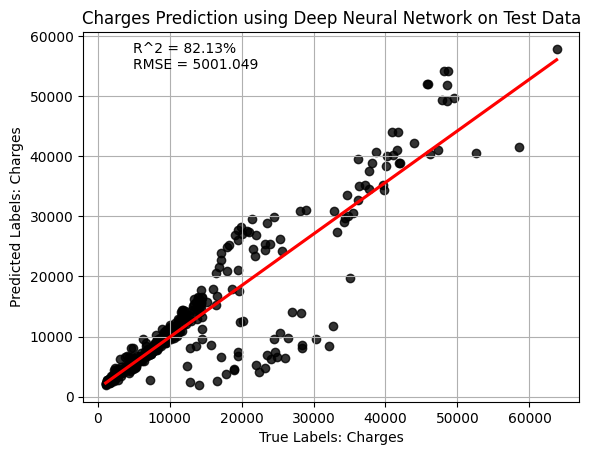

In [134]:
# Melakukan prediksi data test
y_pred_dnn = model.predict(x_test_soal7_dnn)

# Melakukan evaluasi model dengan menghitung r2 score dan rmse
r2_dnn = r2_score(y_test_soal7_dnn, y_pred_dnn)
rmse_dnn = np.sqrt(mean_squared_error(y_test_soal7_dnn, y_pred_dnn))

# Plotting Data dan hasil prediksi
sns.regplot(x=y_test_soal7_dnn, y=y_pred_dnn, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlabel("True Labels: Charges")
plt.ylabel("Predicted Labels: Charges")
plt.title("Charges Prediction using Deep Neural Network on Test Data")
plt.grid(True)
# print r2 score
plt.text(0.1, 0.9, f"R^2 = {(r2_dnn)*100:.2f}%\nRMSE = {rmse_dnn:.3f}", transform=plt.gca().transAxes)
plt.show()

### Analisis Soal 7

#### - Menentukan model terbaik dalam memprediksi Charges
Berdasarkan hasil evaluasi, model terbaik adalah `Random Forest Regression` dengan nilai $R^2$ $score$ sebesar $84.0$% dan RMSE sebesar $4731.82$. Model terburuk adalah `Ridge Regression` dengan nilai $R^2$ $score$ sebesar $74.18$% dan RMSE sebesar $6011.25$. Model-model lainnya memiliki nilai $R^2$ $score$ dan RMSE yang tidak jauh berbeda. Model-model tersebut adalah `Linear Regression`, `Polynomial Regression`, `Gradient Boosting Regression`, dan `Decision Tree Regression`. Dari hasil evaluasi, dapat disimpulkan bahwa model-model tersebut tidak overfitting dan tidak underfitting karena nilai $R^2$ $score$-nya lebih dari $70$% dan RMSE-nya tidak terlalu besar. Oleh karena itu, model-model tersebut dapat digunakan untuk memprediksi `charges` seseorang.

#### - Optimisasi model
Percobaan selanjutnya dilakukan dengan melakukan scaling feature terlebih dahulu sebelum diprediksi, hasil yang didapatkan masih mendekati dengan percobaan sebelumnya dengan model yang memiliki $R^2$ $score$ terbaik tetapi dipegang oleh `Random Forest Regression` dengan nilai $84.0$% dan RMSE sebesar $4731.82$.

#### - Perbandingan Linear Regression dan Non-Linear Regression:
Berdasarkan tabel di atas, terlihat bahwa semua `Non-Linear Regression model memiliki nilai yang lebih baik dibandingkan Linear Regression`. Ini menunjukkan bahwa berdasarkan distribusi data yang dimiliki, Non-Linear Regression model memiliki performance yang lebih baik dalam memprediksi charges yang perlu dibayarkan oleh seseorang berdasarkan kriteria yang ia miliki.

#### - Additional Work
Percobaan selanjutnya dilakukan dengan menggunakan TensorFlow Keras dalam memprediksi charges sesuai dengan data yang dimiliki. Namun setelah dilakukan beberapa kali percobaan dengan hyperparameter yang berbeda, $R^2$ $Score$ yang didapatkan berkisar dari $81$% sampai $82$% saja dengan nilai tertingginya yaitu $82.39$%. Hasil yang didapatkan menggunakan `Random Forest Regression` lebih baik dibandingkan menggunakan DNN. Jadi, terbukti bahwa model terbaik dalam memprediksi charges yang harus dibayarkan oleh seseorang berdasarkan kriteria yang dimilikinya yaitu menggunakan `Random Forest Regression Model`